In [916]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity =  "all"

import pandas as pd

In [917]:


# declare global variables
global DATA_PATH 
global GENERATED_PATH_STEP1 
global GENERATED_PATH_STEP2 
global COLORS
global scaler_selector
global clustering_method_selector
global d3_colors

# gobal variables values
DATA_PATH = 'data/'
GENERATED_PATH_STEP1 = 'data/generated_PX/'
GENERATED_PATH_STEP2 = 'data/generated_PX_02/'
# COLORS = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred']
d3_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
COLORS = d3_colors

# define the keys and values the same: MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer. keys are the strings, values are the objects
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer
scaler_selector = {'MinMaxScaler': MinMaxScaler(), 'StandardScaler': StandardScaler(), 'MaxAbsScaler': MaxAbsScaler(), 'RobustScaler': RobustScaler(), 'Normalizer': Normalizer()}
# define the keys and values the same: KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering. keys are the strings, values are the objects
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering
clustering_method_selector = {'KMeans': KMeans(), 'AgglomerativeClustering': AgglomerativeClustering(), 'DBSCAN': DBSCAN(), 'Birch': Birch(), 'MeanShift': MeanShift(), 'SpectralClustering': SpectralClustering()}


# Functions:

#### radar chart function:

In [918]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

def radar_subplot(ax, row, cluster_label, categories, angles, color, num_samples, all_samples, radial_min, radial_max):
    values = row.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {cluster_label}: {num_samples} ({round(num_samples/all_samples*100,2)}%)', color=color)
    ax.fill(angles, values, alpha=0.25, color=color)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, color='grey', size=12)
    ax.set_ylim(radial_min, radial_max)
    ax.set_yticks(np.linspace(radial_min, radial_max, 5))
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))

def create_radar_subplots(df, title, num_samples_per_cluster, save_path=None):
    categories = list(df)
    num_vars = len(categories)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    num_clusters = len(df)
    num_rows = (num_clusters + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows), subplot_kw=dict(polar=True), facecolor='white', edgecolor='white')
    axes = axes.flatten()

    radial_min = df.min().min()
    radial_max = df.max().max()

    for i, (index, row) in enumerate(df.iterrows()):
        radar_subplot(axes[i], row, index, categories, angles, color=COLORS[i], num_samples=num_samples_per_cluster[i], all_samples=sum(num_samples_per_cluster), radial_min=radial_min, radial_max=radial_max)

    if num_clusters % 2 != 0:
        axes[-1].axis('off')

    fig.suptitle(title, fontsize=20, color='black', y=1.05)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    if save_path is not None:
        plt.savefig(save_path, dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.3)
    else:
        plt.show()


In [919]:
# import numpy as np
# import matplotlib.pyplot as plt
# from math import pi

# COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# def radar_subplot(ax, row, cluster_label, categories, angles, color, num_samples, all_samples):
#     values = row.values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, label=f'Cluster {cluster_label}: {num_samples} ({round(num_samples/all_samples*100,2)}%)', color=color)
#     ax.fill(angles, values, alpha=0.25, color=color)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, color='grey', size=12)
#     ax.set_yticks(np.arange(-1, 1.5, 0.5))
#     ax.set_yticklabels([])
#     ax.set_ylim(-1, 1)
#     ax.spines['polar'].set_visible(False)
#     ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))

# def create_radar_subplots(df, title, num_samples_per_cluster, save_path=None):
#     categories = list(df)
#     num_vars = len(categories)
#     angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
#     angles += angles[:1]

#     num_clusters = len(df)
#     num_rows = (num_clusters + 1) // 2

#     fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows), subplot_kw=dict(polar=True), facecolor='white', edgecolor='white')
#     axes = axes.flatten()

#     for i, (index, row) in enumerate(df.iterrows()):
#         radar_subplot(axes[i], row, index, categories, angles, color=COLORS[i], num_samples=num_samples_per_cluster[i], all_samples=sum(num_samples_per_cluster))

#     if num_clusters % 2 != 0:
#         axes[-1].axis('off')

#     fig.suptitle(title, fontsize=20, color='black', y=1.05)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    

#     if save_path is not None:
#         plt.savefig(save_path, dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.3)
#     else:
#         plt.show()


#### prepare data for radar chart function:

use different colors for each cluster

In [920]:

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

def prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca, scaler_method, n_top_features=3):
    
    # Extract the top contributive features from PCA components
    pc1_top_features = np.argsort(abs(pca.components_[0]))[::-1][:n_top_features]
    pc2_top_features = np.argsort(abs(pca.components_[1]))[::-1][:n_top_features]

    # Store the top features in a list
    top_features = list(cust_summary_clust.columns[pc1_top_features])  # Add top PC1 features
    for f in cust_summary_clust.columns[pc2_top_features]:
        if f not in top_features:
            top_features.append(f)  # Add top PC2 features (excluding duplicates from PC1)

    # Extract additional top features from PC3 (if needed)
    pc3_top_features = np.argsort(abs(pca.components_[2]))[::-1]
    for f in cust_summary_clust.columns[pc3_top_features]:
        if len(top_features) >= 6:
            break
        if f not in top_features:
            top_features.append(f)  # Add top PC3 features (excluding duplicates from PC1 and PC2)

    print('The 6 top_features for this clustering: ', top_features)

    cust_summary_result_norm = cust_summary_result.copy()
    # keep only the top_features and 'cust_id' and 'cluster' columns, drop the rest
    cust_summary_result_norm = cust_summary_result_norm[['cluster'] + top_features]
    
    # make the first column the index
    cust_summary_result_norm.set_index('cluster', inplace=True)

    # drop rows with index == -1, try to drop the outliers, exception will be raised if there is no -1 index, pass the exception.
    try:
        cust_summary_result_norm.drop(index=-1, inplace=True)
    except: 
        pass

    # use the Normalizer to normalize the data, after that reconvert it to a dataframe with the same index and columns
    # scaler = Normalizer()
    scaler = scaler_selector[scaler_method] # StandardScaler()
    cust_summary_result_norm = pd.DataFrame(scaler.fit_transform(cust_summary_result_norm), index=cust_summary_result_norm.index, columns=cust_summary_result_norm.columns)

    
    
    # count the number of nunique of index, the size of each cluster
    num_samples_per_cluster = cust_summary_result_norm.index.value_counts()

    # do pivot table, group by cluster and calculate the mean, and sort by cluster ascending
    cust_summary_result_norm_pivot = cust_summary_result_norm.pivot_table(index='cluster', aggfunc='mean').sort_index()

    return cust_summary_result_norm_pivot, num_samples_per_cluster



use the same scaler to visualize the clusters

In [921]:

# import math
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

# def prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca, n_top_features=3):
    
#     # Extract the top contributive features from PCA components
#     pc1_top_features = np.argsort(abs(pca.components_[0]))[::-1][:n_top_features]
#     pc2_top_features = np.argsort(abs(pca.components_[1]))[::-1][:n_top_features]

#     # Store the top features in a list
#     top_features = list(cust_summary_clust.columns[pc1_top_features])  # Add top PC1 features
#     for f in cust_summary_clust.columns[pc2_top_features]:
#         if f not in top_features:
#             top_features.append(f)  # Add top PC2 features (excluding duplicates from PC1)

#     # Extract additional top features from PC3 (if needed)
#     pc3_top_features = np.argsort(abs(pca.components_[2]))[::-1]
#     for f in cust_summary_clust.columns[pc3_top_features]:
#         if len(top_features) >= 6:
#             break
#         if f not in top_features:
#             top_features.append(f)  # Add top PC3 features (excluding duplicates from PC1 and PC2)

#     print('The 6 top_features for this clustering: ', top_features)

#     cust_summary_result_norm = cust_summary_result.copy()
#     # keep only the top_features and 'cust_id' and 'cluster' columns, drop the rest
#     cust_summary_result_norm = cust_summary_result_norm[['cluster'] + top_features]
    
#     # make the first column the index
#     cust_summary_result_norm.set_index('cluster', inplace=True)

#     # drop rows with index == -1, try to drop the outliers, exception will be raised if there is no -1 index, pass the exception.
#     try:
#         cust_summary_result_norm.drop(index=-1, inplace=True)
#     except: 
#         pass

#     # use the Normalizer to normalize the data, after that reconvert it to a dataframe with the same index and columns
#     # scaler = Normalizer()
#     scaler = StandardScaler()
#     cust_summary_result_norm = pd.DataFrame(scaler.fit_transform(cust_summary_result_norm), index=cust_summary_result_norm.index, columns=cust_summary_result_norm.columns)

    
    
#     # count the number of nunique of index, the size of each cluster
#     num_samples_per_cluster = cust_summary_result_norm.index.value_counts()

#     # do pivot table, group by cluster and calculate the mean, and sort by cluster ascending
#     cust_summary_result_norm_pivot = cust_summary_result_norm.pivot_table(index='cluster', aggfunc='mean').sort_index()

#     return cust_summary_result_norm_pivot, num_samples_per_cluster



# Target

### Output

In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

# Read the Original Datas

In [922]:
import pandas as pd
import os

class DataLoader:
    
    def __init__(self, data_path=DATA_PATH, sep=","):
        self.data_path = data_path
        self.sep = sep
        
    def load_dataframes(self):
        for file in os.listdir(self.data_path):
            if file.endswith(".csv"):
                df_name = file.split(".")[0]
                df = pd.read_csv(os.path.join(self.data_path, file), sep=self.sep)
                setattr(self, df_name, df)
                globals()[df_name] = df
                
    def write_summary(self):
        with open(os.path.join(GENERATED_PATH_STEP2, "summary.txt"), "w") as summary_file:
            for var_name, var in self.__dict__.items():
                if isinstance(var, pd.DataFrame):
                    summary_file.write(f"{var_name}\n")
                    summary_file.write(f"{var.head()}\n\n")
                    
data_loader = DataLoader(sep=';')
data_loader.load_dataframes()
data_loader.write_summary()


#### lis the dataframes name in workplace

In [923]:
# show the active dataframes in this workspace
dataframes = [df for df in globals() if df.startswith("twm_")]
dataframes

['twm_accounts',
 'twm_checking_acct',
 'twm_checking_tran',
 'twm_credit_acct',
 'twm_credit_tran',
 'twm_customer',
 'twm_savings_acct',
 'twm_savings_tran',
 'twm_transactions',
 'twm_accounts_wrk',
 'twm_checking_acct_wrk',
 'twm_checking_tran_wrk',
 'twm_credit_acct_wrk',
 'twm_credit_tran_wrk',
 'twm_customer_wrk',
 'twm_savings_acct_wrk',
 'twm_savings_tran_wrk',
 'twm_transactions_wrk']

#### print the statistics of the dataframes (object-oriented version)

In [924]:
import pandas as pd

class DataSummary:
    
    def __init__(self, prefix='twm_', data_path = DATA_PATH, filename = GENERATED_PATH_STEP2 + 'statistic_summary.txt'):
        self.prefix = prefix
        self.filename = filename
        
    def write_summary(self):
        dfs = [(var_name, df) for var_name, df in globals().items() if var_name.startswith(self.prefix) and isinstance(df, pd.DataFrame)]
        with open(self.filename, 'w') as f:
            for var_name, df in dfs:
                df.name = var_name
                f.write(f"\n{'='*80}\n")
                f.write(f"\n{'='*80}\n")
                f.write(f"Summary for dataframe: {df.name}\n")
                f.write(f"\n{'='*80}\n")
                f.write(f"\n{'='*80}\n")
                f.write("Shape:\n")
                f.write(f"{df.shape}\n")
                # f.write(f"\n{'-'*50}\n")
                # f.write("Columns:\n")
                # f.write(f"{pd.DataFrame(df.columns)}\n")                
                f.write(f"\n{'-'*50}\n")
                f.write("head:\n")                
                f.write(f"{df.head(5)}\n")
                f.write(f"\n{'-'*50}\n")
                f.write("info:\n")
                df.info(buf=f)
                f.write('\n')
                # f.write(f"\n{'-'*50}\n")
                # f.write("describe:\n")
                # f.write(f"{df.describe()}\n")
                # f.write(f"\n{'-'*50}\n")
                # f.write("isnull:\n")
                # f.write(f"{df.isnull().sum()}\n")
                # f.write(f"\n{'-'*50}\n")
                # f.write("null ratio:\n")
                # f.write(f"{df.isnull().sum()/len(df)}\n")
                # f.write(f"\n{'-'*50}\n\n")
                
summary = DataSummary()
summary.write_summary()

## Create copy of the dataframes as _wrk

In [925]:
df_names_list = [
    'twm_accounts',
    'twm_checking_acct',
    'twm_checking_tran',
    'twm_credit_acct',
    'twm_credit_tran',
    'twm_customer',
    'twm_savings_acct',
    'twm_savings_tran',
    'twm_transactions'
]

# Create copies of the original dataframes in the workspace, adding suffix "_wrk" in an automated way
# Their names are listed in the df_list
for df in df_names_list:
    if (df + '_wrk') in locals():
        exec(f'del {df}_wrk')
    exec(f'{df}_wrk = {df}.copy()')

# list of dataframe names as strings
df_names_list_wrk = [
    'twm_accounts_wrk',
    'twm_checking_acct_wrk',
    'twm_checking_tran_wrk',
    'twm_credit_acct_wrk',
    'twm_credit_tran_wrk',
    'twm_customer_wrk',
    'twm_savings_acct_wrk',
    'twm_savings_tran_wrk',
    'twm_transactions_wrk'
]

# Examine the dataframes

In [926]:
twm_credit_tran_wrk.tran_date


0        20.10.1995
1        13.10.1995
2         26.2.1995
3          3.1.1995
4          4.7.1995
            ...    
20162     20.5.1995
20163     28.9.1995
20164     12.5.1995
20165    16.10.1995
20166      2.2.1995
Name: tran_date, Length: 20167, dtype: object

# Data type conversion on the _wrk dataframes




In [927]:
# conver the columns containing the following strings to another data type:
# cust_id --> object
# acct_nbr --> object
# tran_id --> object
# date --> datetime
# time --> datetime
# amount --> float
# balance --> float
# credit_limit --> float

import numpy as np

# for loop for the dataframes in df_names_list_wrk
for df_name in df_names_list_wrk:
    df = locals()[df_name]
    for col in df.columns:
        if 'cust_id' in col:
            df[col] = df[col].astype('object')
        elif 'acct_nbr' in col:
            df[col] = df[col].astype('object')
        elif 'tran_id' in col:
            df[col] = df[col].astype('object')
        elif 'date' in col:
            df[col] = pd.to_datetime(df[col], format='%d.%m.%Y')
        elif 'amount' in col:
            df[col] = df[col].astype('float')
        elif 'balance' in col:
            df[col] = df[col].astype('float')
        elif 'credit_limit' in col:
            df[col] = df[col].astype('float')
        # elif 'time' in col: has issues
        # Therefore when doing the following elif for “time”, you need to examine the datatype of the colum. And there are “     ” values for the object type columns with the name ‘tran_time’



In [928]:
# Sample code for converting seconds to time format
# 
# # import pandas as pd

# data = {'seconds': [53313, 12345, 67890]}
# df = pd.DataFrame(data)
# col = 'seconds'
# df[col] = pd.to_timedelta(df[col].astype(int), unit='s')
# df[col]

In [929]:
# twm_checking_tran.tran_time.dtype # dtype('O')
# twm_savings_tran.tran_time.dtype # dtype('O')
# twm_transactions.tran_time.dtype # dtype('int64')

# twm_checking_tran_wrk.tran_time.dtype # dtype('O')
# twm_savings_tran_wrk.tran_time.dtype # dtype('O')
# twm_transactions_wrk.tran_time.dtype # dtype('int64')

# Alternative way
Withouth creating the global merged dataframe.

### Output

In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

### To verify the subset relationship: check by the 'tran_id' column

* check whether the 'tran_id' in 'twm_checking_tran', 'twm_savings_tran', 'twm_credit_tran' are all included win the 'tran_id' in 'twm_transactions'


#### Method 1:

In [930]:
# # check whether the 'tran_id' in 'twm_checking_tran', 'twm_savings_tran', 'twm_credit_tran' are all included win the 'tran_id' in 'twm_transactions'
# twm_transactions_wrk['tran_id'].isin(twm_checking_tran_wrk['tran_id']).all()
# twm_transactions_wrk['tran_id'].isin(twm_savings_tran_wrk['tran_id']).all()
# twm_transactions_wrk['tran_id'].isin(twm_credit_tran_wrk['tran_id']).all()

# # reverse check
# twm_checking_tran_wrk['tran_id'].isin(twm_transactions_wrk['tran_id']).all()
# twm_savings_tran_wrk['tran_id'].isin(twm_transactions_wrk['tran_id']).all()
# twm_credit_tran_wrk['tran_id'].isin(twm_transactions_wrk['tran_id']).all()

# # check the data types of all the 'tran_id' columns in different dataframes
# twm_transactions_wrk['tran_id'].dtype
# twm_checking_tran_wrk['tran_id'].dtype
# twm_savings_tran_wrk['tran_id'].dtype
# twm_credit_tran_wrk['tran_id'].dtype
# # all the 'tran_id' columns are of type 'int64'

# # convert them into 'str' type (object type)
# twm_transactions_wrk['tran_id'] = twm_transactions_wrk['tran_id'].astype('str')
# twm_checking_tran_wrk['tran_id'] = twm_checking_tran_wrk['tran_id'].astype('str')
# twm_savings_tran_wrk['tran_id'] = twm_savings_tran_wrk['tran_id'].astype('str')
# twm_credit_tran_wrk['tran_id'] = twm_credit_tran_wrk['tran_id'].astype('str')
# # dtype('O') means object type, which is the same as 'str' type, in pandas


#### Method 2:


In [931]:
# get the set of all transaction IDs from each of the checking, savings, and credit dataframes
checking_ids = set(twm_checking_tran['tran_id'].unique())
savings_ids = set(twm_savings_tran['tran_id'].unique())
credit_ids = set(twm_credit_tran['tran_id'].unique())

# concatenate these sets together into a single set of all transaction IDs
all_ids = checking_ids | savings_ids | credit_ids

# get the set of transaction IDs from the transactions dataframe
transactions_ids = set(twm_transactions['tran_id'].unique())

# check whether all transaction IDs in the other dataframes are also in the transactions dataframe
if all_ids.issubset(transactions_ids):
    print("All transaction IDs in checking, savings, and credit dataframes are included in transactions dataframe.")
else:
    print("Not all transaction IDs in checking, savings, and credit dataframes are included in transactions dataframe.")


All transaction IDs in checking, savings, and credit dataframes are included in transactions dataframe.


In [932]:
# whether twm_checking_tran_wrk, twm_savings_tran_wrk, twm_credit_tran_wrk have the same columns
# twm_checking_tran_wrk.columns == twm_savings_tran_wrk.columns == twm_credit_tran_wrk.columns
twm_checking_tran_wrk.columns == twm_savings_tran_wrk.columns

twm_savings_tran_wrk.columns == twm_credit_tran_wrk.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

```python
# list of dataframe names as strings
df_names_list_wrk = [
    'twm_accounts_wrk',
    'twm_checking_acct_wrk',
    'twm_checking_tran_wrk',
    'twm_credit_acct_wrk',
    'twm_credit_tran_wrk',
    'twm_customer_wrk',
    'twm_savings_acct_wrk',
    'twm_savings_tran_wrk',
    'twm_transactions_wrk'
]
```

In [933]:
# 
twm_accounts_wrk.acct_type.unique()

array(['SV  ', 'CC  ', 'CK  '], dtype=object)

In [934]:
twm_checking_tran_wrk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46204 entries, 0 to 46203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cust_id        46204 non-null  object        
 1   tran_id        46204 non-null  object        
 2   tran_amt       46204 non-null  float64       
 3   principal_amt  46204 non-null  float64       
 4   interest_amt   46204 non-null  float64       
 5   new_balance    46204 non-null  float64       
 6   tran_date      46204 non-null  datetime64[ns]
 7   tran_time      46204 non-null  object        
 8   channel        46204 non-null  object        
 9   tran_code      46204 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 3.5+ MB


In [935]:
import pandas as pd
import numpy as np

# Load the necessary tables

# Aggregate the transaction data for each customer by account type
cust_trans_chk = twm_checking_tran_wrk.groupby('cust_id').agg({'tran_amt': ['mean', 'median', 'std', lambda x: np.percentile(x, 75)-np.percentile(x, 25), 'min', 'max']})
cust_trans_chk.columns = ['checking_transaction_amount_mean', 'checking_transaction_amount_median', 'checking_transaction_amount_std', 'checking_transaction_amount_interquartile', 'checking_transaction_amount_min', 'checking_transaction_amount_max']

cust_trans_sav = twm_savings_tran_wrk.groupby('cust_id').agg({'tran_amt': ['mean', 'median', 'std', lambda x: np.percentile(x, 75)-np.percentile(x, 25), 'min', 'max']})
cust_trans_sav.columns = ['savings_transaction_amount_mean', 'savings_transaction_amount_median', 'savings_transaction_amount_std', 'savings_transaction_amount_interquartile', 'savings_transaction_amount_min', 'savings_transaction_amount_max']

cust_trans_cre = twm_credit_tran_wrk.groupby('cust_id').agg({'tran_amt': ['mean', 'median', 'std', lambda x: np.percentile(x, 75)-np.percentile(x, 25), 'min', 'max']})
cust_trans_cre.columns = ['credit_transaction_amount_mean', 'credit_transaction_amount_median', 'credit_transaction_amount_std', 'credit_transaction_amount_interquartile', 'credit_transaction_amount_min', 'credit_transaction_amount_max']

# Merge the transaction statistics for each account type by customer
cust_trans_agg = pd.merge(cust_trans_chk, cust_trans_sav, on='cust_id', how='outer')
cust_trans_agg = pd.merge(cust_trans_agg, cust_trans_cre, on='cust_id', how='outer')

cust_trans_agg.reset_index(inplace=True)


# =================== Frequency ====================================
# Calculate transaction frequency for each account type
checking_tran_freq_temp = twm_checking_tran_wrk[['cust_id', 'tran_date']].copy()
checking_tran_freq_temp = checking_tran_freq_temp.sort_values(['cust_id', 'tran_date'])
checking_tran_freq_temp['diff'] = checking_tran_freq_temp.groupby('cust_id')['tran_date'].diff().dt.total_seconds() / 86400
checking_tran_freq_temp = checking_tran_freq_temp.dropna()
checking_tran_freq = checking_tran_freq_temp.groupby('cust_id')['diff'].median().round(1)

savings_tran_freq_temp = twm_savings_tran_wrk[['cust_id', 'tran_date']].copy()
savings_tran_freq_temp = savings_tran_freq_temp.sort_values(['cust_id', 'tran_date'])
savings_tran_freq_temp['diff'] = savings_tran_freq_temp.groupby('cust_id')['tran_date'].diff().dt.total_seconds() / 86400
savings_tran_freq_temp = savings_tran_freq_temp.dropna()
savings_tran_freq = savings_tran_freq_temp.groupby('cust_id')['diff'].median().round(1)

credit_tran_freq_temp = twm_credit_tran_wrk[['cust_id', 'tran_date']].copy()
credit_tran_freq_temp = credit_tran_freq_temp.sort_values(['cust_id', 'tran_date'])
credit_tran_freq_temp['diff'] = credit_tran_freq_temp.groupby('cust_id')['tran_date'].diff().dt.total_seconds() / 86400
credit_tran_freq_temp = credit_tran_freq_temp.dropna()
credit_tran_freq = credit_tran_freq_temp.groupby('cust_id')['diff'].median().round(1)



# ==== Calculate the number of accounts for each customer ====

# twm_accounts_wrk.acct_type.unique(): ['SV  ', 'CC  ', 'CK  ']
# Calculate whether each customer has a savings and/or credit account
has_savings = twm_accounts_wrk[twm_accounts_wrk['acct_type'] == 'SV  '].groupby('cust_id').size().reset_index(name='counts_saving')
has_credit = twm_accounts_wrk[twm_accounts_wrk['acct_type'] == 'CC  '].groupby('cust_id').size().reset_index(name='counts_credit')
has_checking = twm_accounts_wrk[twm_accounts_wrk['acct_type'] == 'CK  '].groupby('cust_id').size().reset_index(name='counts_checking')


# Calculate how much each customer saves and how much they live in debt
savings_amt = twm_savings_tran_wrk.groupby('cust_id')['tran_amt'].sum().reset_index(name='how_much_do_they_save')
credit_amt = twm_credit_tran_wrk.groupby('cust_id')['tran_amt'].sum().reset_index(name='how_much_do_they_live_in_debt')
checking_amt = twm_checking_tran_wrk.groupby('cust_id')['tran_amt'].sum().reset_index(name='how_much_do_they_spend')

# Combine the data into a single table
cust_summary = twm_customer_wrk[['cust_id']]
cust_summary = cust_summary.merge(has_savings, on='cust_id', how='left')
cust_summary = cust_summary.merge(savings_amt, on='cust_id', how='left')
cust_summary = cust_summary.merge(has_credit, on='cust_id', how='left')
cust_summary = cust_summary.merge(credit_amt, on='cust_id', how='left')
cust_summary = cust_summary.merge(has_checking, on='cust_id', how='left') # checking account
cust_summary = cust_summary.merge(cust_trans_agg, on='cust_id', how='left')

# Merge the transaction frequency data with the existing customer account data
cust_summary = cust_summary.merge(checking_tran_freq.to_frame(name='checking_transaction_frequency_median'), on='cust_id', how='left')
# cust_summary = cust_summary.merge(checking_tran_freq_std.to_frame(name='checking_transaction_frequency_std'), on='cust_id', how='left')
cust_summary = cust_summary.merge(savings_tran_freq.to_frame(name='savings_transaction_frequency_median'), on='cust_id', how='left')
# cust_summary = cust_summary.merge(savings_tran_freq_std.to_frame(name='savings_transaction_frequency_std'), on='cust_id', how='left')
cust_summary = cust_summary.merge(credit_tran_freq.to_frame(name='credit_transaction_frequency_median'), on='cust_id', how='left')
# cust_summary = cust_summary.merge(credit_tran_freq_std.to_frame(name='credit_transaction_frequency_std'), on='cust_id', how='left')


# Convert NaN values to 0
cust_summary.fillna(0, inplace=True)

# Print the resulting table
print(cust_summary.head())


# save cust_summary to a csv file
cust_summary.to_csv(GENERATED_PATH_STEP2 + 'cust_summary.csv', index=False)

   cust_id  counts_saving  how_much_do_they_save  counts_credit  \
0  1362691            0.0                   0.00            0.0   
1  1362487            1.0                -638.84            1.0   
2  1363160            1.0                   9.50            1.0   
3  1362752            1.0                   9.07            1.0   
4  1362548            1.0                   3.78            1.0   

   how_much_do_they_live_in_debt  counts_checking  \
0                           0.00              0.0   
1                       -1535.59              1.0   
2                         380.03              0.0   
3                        2406.65              1.0   
4                        6977.25              1.0   

   checking_transaction_amount_mean  checking_transaction_amount_median  \
0                          0.000000                                0.00   
1                        -26.513269                              -10.00   
2                          0.000000                  

In [936]:
cust_summary.columns
cust_summary.describe()

Index(['cust_id', 'counts_saving', 'how_much_do_they_save', 'counts_credit',
       'how_much_do_they_live_in_debt', 'counts_checking',
       'checking_transaction_amount_mean',
       'checking_transaction_amount_median', 'checking_transaction_amount_std',
       'checking_transaction_amount_interquartile',
       'checking_transaction_amount_min', 'checking_transaction_amount_max',
       'savings_transaction_amount_mean', 'savings_transaction_amount_median',
       'savings_transaction_amount_std',
       'savings_transaction_amount_interquartile',
       'savings_transaction_amount_min', 'savings_transaction_amount_max',
       'credit_transaction_amount_mean', 'credit_transaction_amount_median',
       'credit_transaction_amount_std',
       'credit_transaction_amount_interquartile',
       'credit_transaction_amount_min', 'credit_transaction_amount_max',
       'checking_transaction_frequency_median',
       'savings_transaction_frequency_median',
       'credit_transaction_freq

,cust_id,counts_saving,how_much_do_they_save,counts_credit,how_much_do_they_live_in_debt,counts_checking,checking_transaction_amount_mean,checking_transaction_amount_median,checking_transaction_amount_std,checking_transaction_amount_interquartile,...,savings_transaction_amount_max,credit_transaction_amount_mean,credit_transaction_amount_median,credit_transaction_amount_std,credit_transaction_amount_interquartile,credit_transaction_amount_min,credit_transaction_amount_max,checking_transaction_frequency_median,savings_transaction_frequency_median,credit_transaction_frequency_median
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.00000,747.000000,747.000000,747.000000
mean,1.362991e+06,0.563588,216.565743,0.626506,20.883440,0.696118,-11.681697,-6.491707,139.897856,60.461041,...,257.042262,27.507680,-14.055201,203.437371,128.972289,-239.357858,797.45577,0.998661,7.619143,3.777778
std,2.925255e+02,0.496272,826.773828,0.484056,1647.451948,0.460241,23.423265,17.002568,144.295397,76.543694,...,476.460804,379.668728,382.156255,262.773761,158.652222,498.588677,1357.60557,4.385037,9.885463,5.516926
min,1.362480e+06,0.000000,-2405.190000,0.000000,-9500.000000,0.000000,-174.515758,-200.000000,0.000000,0.000000,...,0.000000,-351.851852,-309.260000,0.000000,0.000000,-1565.500000,0.00000,0.000000,0.000000,0.000000
25%,1.362732e+06,0.000000,0.000000,0.000000,-474.670000,0.000000,-22.174848,-10.000000,0.000000,0.000000,...,0.000000,-9.358480,-70.067500,0.000000,0.000000,-425.970000,0.00000,0.000000,0.000000,0.000000
50%,1.362993e+06,1.000000,0.000000,1.000000,0.000000,1.000000,-1.148081,-0.150000,131.084162,40.562500,...,0.480000,0.000000,-20.000000,145.096329,116.180000,-224.240000,227.44000,0.000000,4.000000,3.000000
75%,1.363244e+06,1.000000,163.870000,1.000000,29.025000,1.000000,0.000000,0.000000,184.922541,88.975000,...,317.580000,0.664253,0.000000,295.834715,187.763750,0.000000,1010.68000,1.000000,12.000000,5.000000
max,1.363495e+06,1.000000,11079.940000,1.000000,10440.060000,1.000000,65.337778,7.000000,973.510227,681.120000,...,4478.610000,8735.140000,8735.140000,2425.403475,1284.380000,8735.140000,17464.52000,91.000000,31.000000,32.000000


In [937]:
# rename the columns with 

mapping_dict = {
    'counts_saving': 'sav_cnt',
    'how_much_do_they_save': 'sav_saved', #'sav_amt',
    'counts_credit': 'cr_cnt',
    'how_much_do_they_live_in_debt': 'cr_debt',   # 'cr_amt',
    'counts_checking': 'chk_cnt',
    'checking_transaction_amount_mean': 'chk_txn_mean',
    'checking_transaction_amount_median': 'chk_txn_median',
    'checking_transaction_amount_std': 'chk_txn_std',
    'checking_transaction_amount_interquartile': 'chk_txn_iqr',
    'checking_transaction_amount_min': 'chk_txn_min',
    'checking_transaction_amount_max': 'chk_txn_max',
    'savings_transaction_amount_mean': 'sav_txn_mean',
    'savings_transaction_amount_median': 'sav_txn_median',
    'savings_transaction_amount_std': 'sav_txn_std',
    'savings_transaction_amount_interquartile': 'sav_txn_iqr',
    'savings_transaction_amount_min': 'sav_txn_min',
    'savings_transaction_amount_max': 'sav_txn_max',
    'credit_transaction_amount_mean': 'cr_txn_mean',
    'credit_transaction_amount_median': 'cr_txn_median',
    'credit_transaction_amount_std': 'cr_txn_std',
    'credit_transaction_amount_interquartile': 'cr_txn_iqr',
    'credit_transaction_amount_min': 'cr_txn_min',
    'credit_transaction_amount_max': 'cr_txn_max',
    'checking_transaction_frequency_median': 'chk_freq',
    'savings_transaction_frequency_median': 'sav_freq',
    'credit_transaction_frequency_median': 'cr_freq'
}

cust_summary.rename(columns=mapping_dict, inplace=True)

In [938]:
cust_summary.columns

Index(['cust_id', 'sav_cnt', 'sav_saved', 'cr_cnt', 'cr_debt', 'chk_cnt',
       'chk_txn_mean', 'chk_txn_median', 'chk_txn_std', 'chk_txn_iqr',
       'chk_txn_min', 'chk_txn_max', 'sav_txn_mean', 'sav_txn_median',
       'sav_txn_std', 'sav_txn_iqr', 'sav_txn_min', 'sav_txn_max',
       'cr_txn_mean', 'cr_txn_median', 'cr_txn_std', 'cr_txn_iqr',
       'cr_txn_min', 'cr_txn_max', 'chk_freq', 'sav_freq', 'cr_freq'],
      dtype='object')

### Feature Selection


In [939]:
# nunique values of each column
cust_summary.nunique()
    

cust_id           747
sav_cnt             2
sav_saved         412
cr_cnt              2
cr_debt           447
chk_cnt             2
chk_txn_mean      519
chk_txn_median    136
chk_txn_std       517
chk_txn_iqr       490
chk_txn_min       514
chk_txn_max       514
sav_txn_mean      410
sav_txn_median    250
sav_txn_std       390
sav_txn_iqr       355
sav_txn_min       373
sav_txn_max       398
cr_txn_mean       454
cr_txn_median     403
cr_txn_std        452
cr_txn_iqr        438
cr_txn_min        431
cr_txn_max        399
chk_freq           23
sav_freq           49
cr_freq            44
dtype: int64

for the nunique = 2 features, I would like to drop them from the dataframe, because they are not useful for the clustering analysis.
clust_freatures = ['cust_id', 'sav_saved', 'cr_debt', 
       'chk_txn_mean', 'chk_txn_median', 'chk_txn_std', 'chk_txn_iqr',
       'chk_txn_min', 'chk_txn_max', 'sav_txn_mean', 'sav_txn_median',
       'sav_txn_std', 'sav_txn_iqr', 'sav_txn_min', 'sav_txn_max',
       'cr_txn_mean', 'cr_txn_median', 'cr_txn_std', 'cr_txn_iqr',
       'cr_txn_min', 'cr_txn_max', 'chk_freq', 'sav_freq', 'cr_freq']

Therefore X = cust_summary[clust_freatures]


In [940]:
# list of columns to keep. Categorical-converted, small-nunique columns are dropped

clust_freatures = ['cust_id', 'sav_saved', 'cr_debt', 
       'chk_txn_mean', 'chk_txn_median', 'chk_txn_std', 'chk_txn_iqr',
       'chk_txn_min', 'chk_txn_max', 'sav_txn_mean', 'sav_txn_median',
       'sav_txn_std', 'sav_txn_iqr', 'sav_txn_min', 'sav_txn_max',
       'cr_txn_mean', 'cr_txn_median', 'cr_txn_std', 'cr_txn_iqr',
       'cr_txn_min', 'cr_txn_max', 'chk_freq', 'sav_freq', 'cr_freq']

cust_summary_drop = cust_summary[clust_freatures].copy()
# cust_summary_drop = cust_summary.copy()
cust_summary_result = cust_summary.copy()
cust_summary_clust = cust_summary_drop.drop('cust_id', axis=1)

In [941]:
# This is based on the elbow method, for debuging purpose, it is placed before the kmeans clustering.
optimal_n_clusters = 4

# Using Kmeans to cluster the customers

### Add PCA as preprocessing, between scaler and elbow for KMeans

In [ ]:
# Debug: Start from Here

PCA_n_preprocessing = 3 # by default, it is 2
scaler_method = 'Normalizer' # by default, it is 'StandardScaler'
# other options are: 'MinMaxScaler', 'StandardScaler', 'MaxAbsScaler', 'RobustScaler', 'Normalizer'
clustering_algorithm = 'KMeans' # one the keys of clustering_method_selector dictionary
# other options are: KMeans, AgglomerativeClustering, DBSCAN, Birch, MeanShift, SpectralClustering. keys are the strings, values are the objects


### KMeans for illustrating the iteration process:


In [945]:
total_iteration = 10
for i in range(1,total_iteration):
    print(f"{i:02}")


01
02
03
04
05
06
07
08
09


In [ ]:
cust_summary_clust

,sav_saved,cr_debt,chk_txn_mean,chk_txn_median,chk_txn_std,chk_txn_iqr,chk_txn_min,chk_txn_max,sav_txn_mean,sav_txn_median,...,sav_txn_max,cr_txn_mean,cr_txn_median,cr_txn_std,cr_txn_iqr,cr_txn_min,cr_txn_max,chk_freq,sav_freq,cr_freq
0,0.00,0.00,0.000000,0.00,0.000000,0.0000,0.00,0.00,0.000000,0.000,...,0.00,0.000000,0.000,0.000000,0.0000,0.00,0.00,0.0,0.0,0.0
1,-638.84,-1535.59,-26.513269,-10.00,122.421905,85.5425,-206.52,680.98,-33.623158,0.000,...,117.71,-47.987187,-100.045,194.951854,148.7975,-254.98,588.77,4.0,10.0,3.0
2,9.50,380.03,0.000000,0.00,0.000000,0.0000,0.00,0.00,0.197917,0.000,...,265.29,5.588676,-78.685,266.321700,137.3175,-239.73,774.71,0.0,5.0,4.0
3,9.07,2406.65,-5.203548,-0.75,308.923483,37.6700,-890.44,1769.27,0.755833,0.760,...,0.76,160.443333,-73.130,733.049475,382.0800,-471.39,2427.02,2.0,31.0,5.5
4,3.78,6977.25,-54.895859,-10.00,254.320999,189.6450,-688.27,728.46,0.315000,0.315,...,0.32,317.147727,-73.345,1578.437359,762.0950,-1007.95,7045.93,1.0,31.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.00,0.00,-38.292273,-10.00,126.158900,91.0700,-280.00,614.42,0.000000,0.000,...,0.00,0.000000,0.000,0.000000,0.0000,0.00,0.00,7.0,0.0,0.0
743,-73.71,-1287.37,0.000000,0.00,0.000000,0.0000,0.00,0.00,-2.632500,0.065,...,298.78,-47.680370,-77.270,186.196668,133.9200,-251.69,665.80,0.0,8.0,1.0
744,0.00,-9200.00,-8.894848,-0.15,352.470284,57.9850,-1992.10,979.08,0.000000,0.000,...,0.00,-328.571429,-309.260,207.997781,263.6750,-751.11,0.00,0.0,0.0,1.0
745,0.00,18.55,-10.008081,-0.15,177.346256,90.7350,-519.45,766.80,0.000000,0.000,...,0.00,0.247333,-82.890,388.485274,156.5950,-420.50,1804.52,0.0,0.0,2.0


In [ ]:
# max and min of each column of ndarray: cust_summary_clust_pca
cust_summary_clust_pca.max(axis=0)
cust_summary_clust_pca.min(axis=0)

# number of rows and columns of ndarray: cust_summary_clust_pca
cust_summary_clust_pca.shape




array([1.02404864, 0.66369527, 0.75525938])

array([-0.90386431, -0.64099145, -0.62015313])

(747, 3)

## investigate the iteration steps: does not work yet.

clustering_algorithm:  KMeans
iteration_time:  1


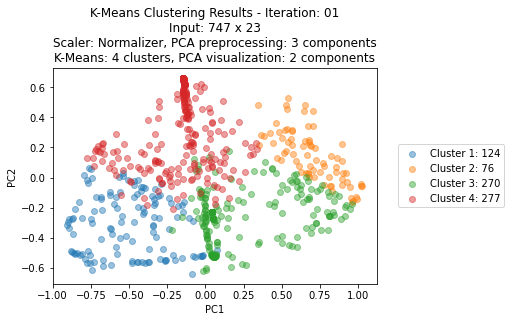

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/1946574854.py:196: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

MovieWriter imagemagick unavailable; using Pillow instead.


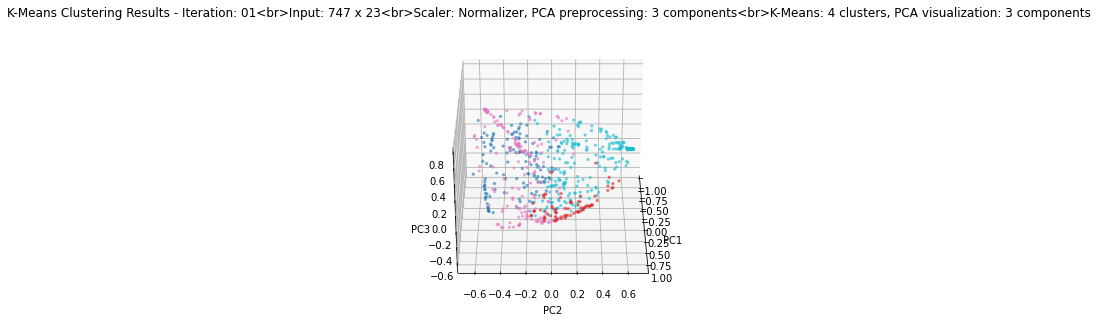

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/1946574854.py:215: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



The 6 top_features for this clustering:  ['cr_debt', 'cr_txn_max', 'chk_txn_max', 'chk_txn_min', 'sav_saved', 'sav_txn_max']
iteration_time:  2


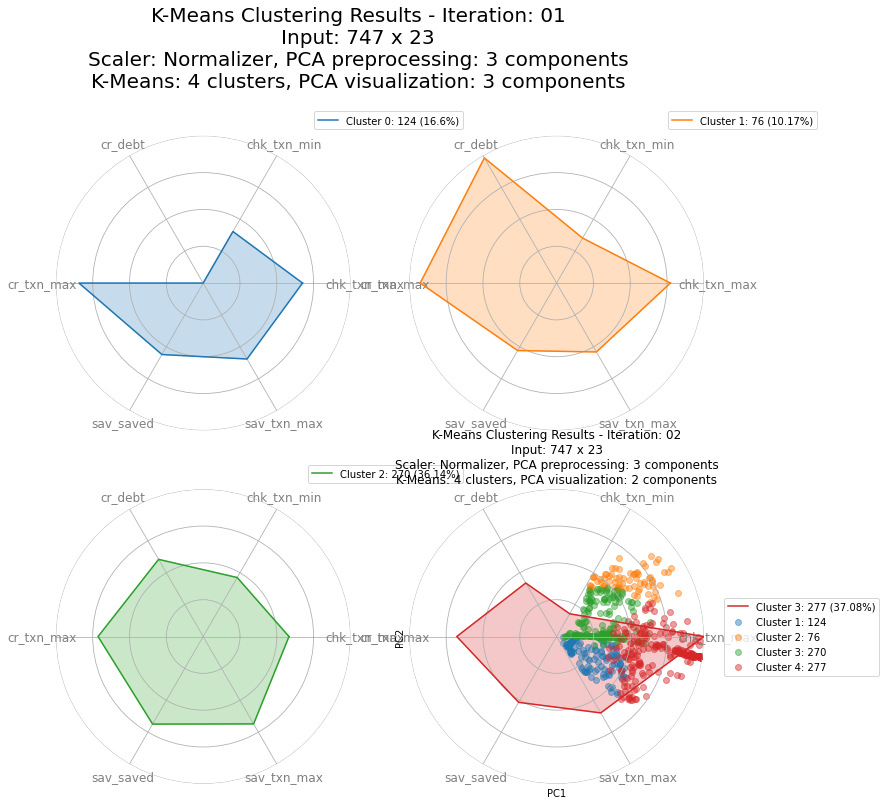

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/1946574854.py:196: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

MovieWriter imagemagick unavailable; using Pillow instead.


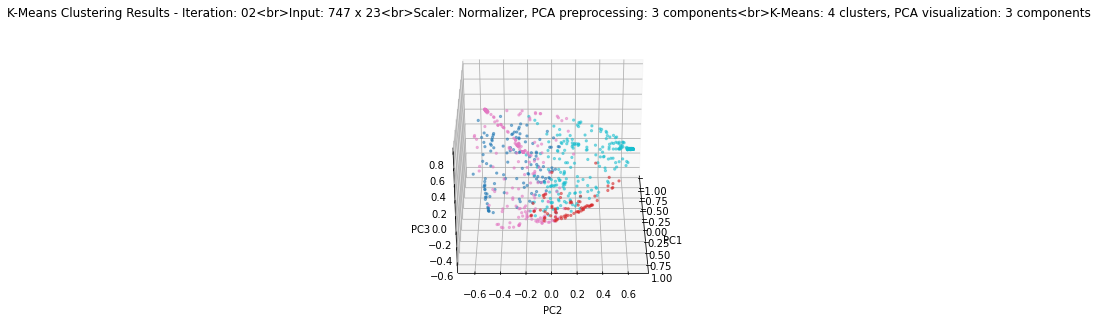

KeyboardInterrupt: 

In [944]:
# total_iteration = 20
# # Specify the custom initial centroids within the data's bounds
# initial_centroids = np.array([[-0.9, -0.6, -0.6],
#                             [1.0, 0.6, 0.7],
#                             [0.5, -0.3, 0.4],
#                             [-0.4, 0.4, -0.2]])
# clustering_algorithm = 'KMeans' # debug
# if clustering_algorithm == 'KMeans': # KMeans, AgglomerativeClustering, DBSCAN
#     print('clustering_algorithm: ', clustering_algorithm)
#     from sklearn.cluster import KMeans
#     from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer
#     from sklearn.decomposition import PCA

#     # Standardize the features using StandardScaler
#     scaler = scaler_selector[scaler_method]
#     cust_summary_clust_scaled = scaler.fit_transform(cust_summary_clust)

#     # Perform PCA on the scaled data
#     pca = PCA(n_components=PCA_n_preprocessing)
#     cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)  
          
#     for iteration_time in range(1,total_iteration):
#         print('iteration_time: ', iteration_time)
        

#         # print(cust_summary_clust_pca)
#         # # Determine the optimal number of clusters using the elbow method
#         # wcss = []
#         # for i in range(1, 11):
#         #     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10, max_iter=iteration_time)
#         #     _ = kmeans.fit(cust_summary_clust_pca)
#         #     wcss.append(kmeans.inertia_)

#         # # Plot the within-cluster sum of squares (WCSS) for different cluster numbers
#         # import matplotlib.pyplot as plt
#         # plt.plot(range(1, 11), wcss)
#         # _ = plt.title(f'Elbow Method\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 2 components')
#         # _ = plt.xlabel('Number of Clusters')
#         # _ = plt.ylabel('WCSS')
#         # _ = plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
#         # _ = plt.savefig(GENERATED_PATH_STEP2 + f'kmeans_elbow_method_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_itr_{iteration_time:02}.png', dpi=300, bbox_inches='tight',facecolor='w', edgecolor='w', pad_inches=0.3)
#         # _ = plt.show()

#         # # Based on the elbow plot, we will choose 3 clusters
#         # kmeans = KMeans(n_clusters=optimal_n_clusters, init='random', random_state=42, n_init=10, max_iter=iteration_time)
        
#         # Specify the custom initial centroids within the data's bounds


#         # Initialize KMeans with custom initial centroids
#         kmeans = KMeans(n_clusters=4, init=initial_centroids, n_init=1,max_iter=1, random_state=1)
#         # kmeans = KMeans(n_clusters=4, max_iter=1, random_state=42)
        
#         _ = kmeans.fit(cust_summary_clust_pca)
#         centroids = kmeans.cluster_centers_
#         # Add the cluster labels to the original dataframe
#         cust_summary_result['cluster'] = kmeans.labels_
        
#         # nomalize the feature values for later visualization
#         # it might be better to use a consistent Normalizer() visualization, no matter which scaler is used for clustering
#         # cust_summary_result.iloc[:, 2:-1] = scaler.transform(cust_summary_result.iloc[:, 2:-1])

#         # Visualize the clusters using PCA
#         import matplotlib.pyplot as plt
#         from matplotlib.colors import ListedColormap

#         # Create a scatter plot of the clusters
#         for i in range(optimal_n_clusters):
#             _ = plt.scatter(cust_summary_clust_pca[kmeans.labels_ == i, 0], 
#                         cust_summary_clust_pca[kmeans.labels_ == i, 1], 
#                         cmap=ListedColormap(COLORS), 
#                         alpha=0.45, 
#                         label=f'Cluster {i+1}: {len(np.where(kmeans.labels_ == i)[0])}') 
#         _ = plt.xlabel('PC1')
#         _ = plt.ylabel('PC2')
#         _ = plt.title(f'K-Means Clustering Results - Iteration: {iteration_time:02}\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 2 components')
#         _ = plt.legend()
#         _ = plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
#         plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
        
#         # Save the plot to a PNG file
#         # _ = plt.savefig(GENERATED_PATH_STEP2 + f'kmeans_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}_clusters_PCA_visualze_2_V1.png', dpi=300, facecolor='white', edgecolor='w')
#         plt.savefig(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_2PCA_itr_{iteration_time:02}.png', dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.2)
#         # Show the plot
#         _ = plt.show()

#         # ===========================================================
#         # =========== Visualize the clusters using 3D PCA ===========
#         # ===========================================================

#         import plotly.graph_objs as go
#         from sklearn.decomposition import PCA

#         # Perform PCA on the data
#         # pca = PCA(n_components=3)
#         # cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)
#         # the above code will overwrite the previous pca result
#         # so we need to re-run the above code to get the pca result
#         # danger: only plot the first 3 PCA components
        
#         # COLORS_GO = [[0.0, 'rgb(255, 0, 0)'], 
#         #                 [0.09090909090909091, 'rgb(0, 128, 0)'], 
#         #                 [0.18181818181818182, 'rgb(128, 0, 128)'], 
#         #                 [0.2727272727272727, 'rgb(255, 165, 0)'], 
#         #                 [0.36363636363636365, 'rgb(0, 0, 139)'], 
#         #                 [0.45454545454545453, 'rgb(0, 100, 0)'], 
#         #                 [0.5454545454545454, 'rgb(95, 158, 160)'], 
#         #                 [0.6363636363636364, 'rgb(144, 238, 144)'], 
#         #                 [0.7272727272727273, 'rgb(128, 128, 128)'], 
#         #                 [0.8181818181818182, 'rgb(0, 0, 0)'], 
#         #                 [0.9090909090909091, 'rgb(211, 211, 211)'], 
#         #                 [1.0, 'rgb(173, 216, 230)']]
#         # COLORS_GO = [
#         #                         (0.0, 1.0, 0.5),      # red
#         #                         (0.3333333333333333, 1.0, 0.5),      # green
#         #                         (0.8333333333333334, 0.5, 0.5),      # purple
#         #                         (0.09411764705882352, 1.0, 0.5),     # orange
#         #                         (0.5833333333333334, 1.0, 0.2725490196078431),    # darkblue
#         #                         (0.3333333333333333, 0.7317073170731707, 0.24705882352941178),   # darkgreen
#         #                         (0.5025125628140703, 0.5, 0.43627450980392156),   # cadetblue
#         #                         (0.3333333333333333, 0.5, 0.5),      # lightgreen
#         #                         (0.0, 0.0, 0.5019607843137255),      # gray
#         #                         (0.0, 0.0, 0.0),     # black
#         #                         (0.0, 0.0, 0.8274509803921568),      # lightgray
#         #                         (0.5757575757575757, 1.0, 0.7450980392156863),     # lightblue
#         #                         (0.0, 1.0, 0.2725490196078431)      # darkred
#                             # ]
#         # COLORS = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred']

#         # from colorsys import rgb_to_hls
#         # import matplotlib.colors
#         # COLORS_HSL = []

#         # for color in COLORS:
#         #     r, g, b = matplotlib.colors.to_rgb(color)
#         #     h, l, s = rgb_to_hls(r, g, b)
#         #     COLORS_HSL.append((h, l, s))
#         import plotly.express as px
#         import plotly.graph_objs as go
#         import plotly.colors          
        
                
#         # Create a 3D scatter plot of the clusters using plotly
#         _ = fig = go.Figure(data=[go.Scatter3d(
#             x=cust_summary_clust_pca[:, 0],
#             y=cust_summary_clust_pca[:, 1],
#             z=cust_summary_clust_pca[:, 2],
#             mode='markers',
#             marker=dict(
#                 size=5,
#                 color=kmeans.labels_,
#                 colorscale=COLORS, 
#                 opacity=0.5
#             )
#         )])

#         # Add axis labels and title
#         _ = fig.update_layout(scene=dict(
#             xaxis_title='PC1',
#             yaxis_title='PC2',
#             zaxis_title='PC3'
#         ), title=f'K-Means Clustering Results - Iteration: {iteration_time:02}<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>K-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components')


#         # Save the plot to a png file
#         _ = fig.write_image(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA_itr_{iteration_time:02}.png')
        
#         # save the plot to a HTML file
#         _ = fig.write_html(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA_itr_{iteration_time:02}.html')

#         # Show the plot
#         _ = fig.show()
        
            
#         # ====================================================================================================
#         # ==== Rotate the 3D plot and save it as a GIF file ==================================================
#         # ====================================================================================================
        
#         import plotly.graph_objs as go
#         import plotly.io as pio
#         from sklearn.decomposition import PCA
#         from sklearn.preprocessing import StandardScaler
#         from sklearn.cluster import DBSCAN
#         from mpl_toolkits.mplot3d import Axes3D
#         import matplotlib.pyplot as plt
#         from matplotlib import animation
#         import numpy as np

#         # create the animation
#         def rotate(angle):
#             ax.view_init(azim=angle)
#             plt.pause(0.1) # add a pause of 0.1 seconds between frames
#             return fig,

#         fig = plt.figure()
#         ax = Axes3D(fig)
#         _ = ax.set_xlabel('PC1')
#         _ = ax.set_ylabel('PC2')
#         _ = ax.set_zlabel('PC3')
#         _ = ax.set_title(f'K-Means Clustering Results - Iteration: {iteration_time:02}<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>K-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components')
#         scatter = ax.scatter(cust_summary_clust_pca[:, 0], 
#                             cust_summary_clust_pca[:, 1], 
#                             cust_summary_clust_pca[:, 2], 
#                             s=5, 
#                             c=kmeans.labels_, 
#                             cmap=ListedColormap(COLORS),
#                             alpha=0.5)
#         rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=50)
#         rot_animation.save(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA_itr_{iteration_time:02}.gif',
#                     dpi=300, writer='imagemagick', fps=30, 
#                     savefig_kwargs={'facecolor': 'white', 'edgecolor': 'w', 'bbox_inches': 'tight', 'pad_inches': 0.2},
#                     metadata={'title': f'K-Means Clustering Results - Iteration: {iteration_time:02}<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>K-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components'})


#         _ = fig.show()
        
#         # ====================================================================================================
#         # ================================ Radar Plot ========================================================
#         # ====================================================================================================
#         # Assuming 'cust_summary_clust' is your DataFrame, and 'pca' is your fitted PCA object
#         # use the same scaler to visualize the radar plot
#         # cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca)
#         # use the different scaler to visualize the radar plot
#         cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca, scaler_method)

#         radar_title = f'K-Means Clustering Results - Iteration: {iteration_time:02}\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components'
#         radar_file_path_and_name = GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA_radar_itr_{iteration_time:02}.png'
#         # Use the returned values to create the radar subplots
        
#         create_radar_subplots(cust_summary_result_norm_pivot, radar_title, num_samples_per_cluster, save_path=radar_file_path_and_name)
        


### regular Kmeans:


clustering_algorithm:  KMeans


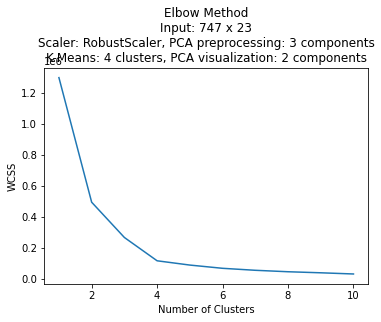

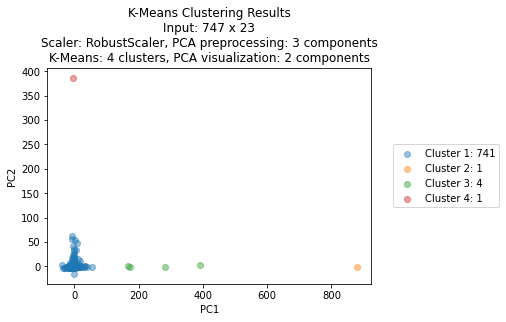

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/912147648.py:177: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

MovieWriter imagemagick unavailable; using Pillow instead.


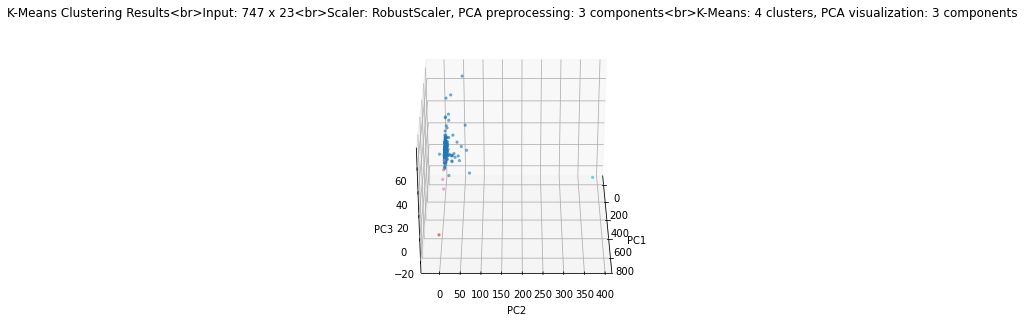

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/912147648.py:196: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



The 6 top_features for this clustering:  ['cr_txn_mean', 'cr_txn_median', 'cr_debt', 'sav_txn_median', 'sav_txn_mean', 'sav_saved']


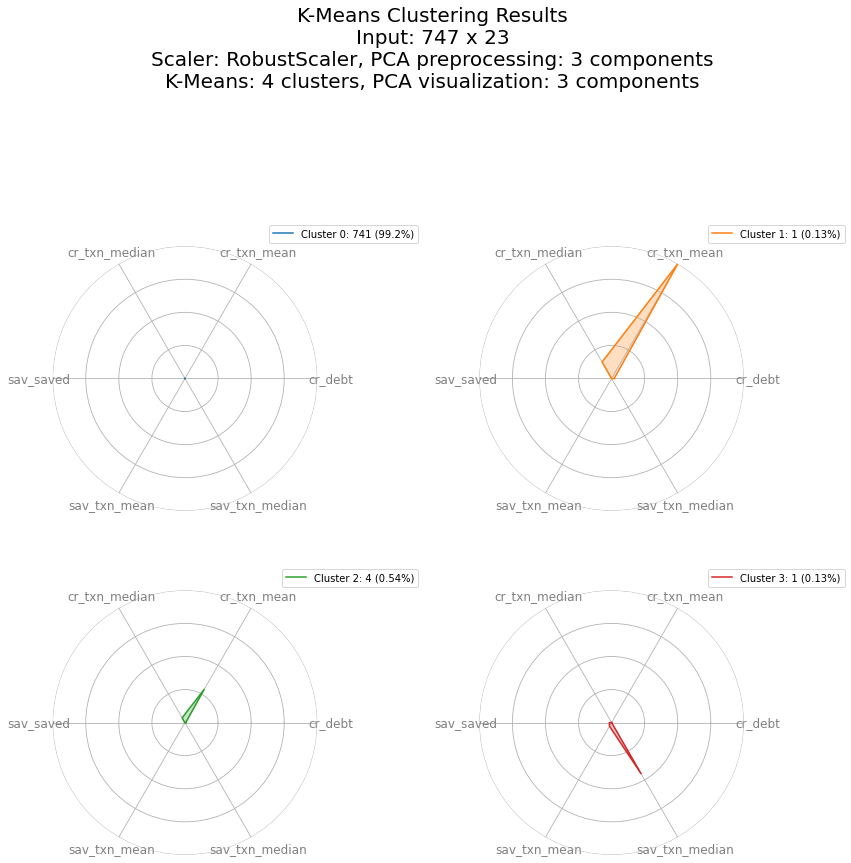

In [ ]:


clustering_algorithm = 'KMeans' # debug
if clustering_algorithm == 'KMeans': # KMeans, AgglomerativeClustering, DBSCAN
    print('clustering_algorithm: ', clustering_algorithm)
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer
    from sklearn.decomposition import PCA

    # Standardize the features using StandardScaler
    scaler = scaler_selector[scaler_method]
    cust_summary_clust_scaled = scaler.fit_transform(cust_summary_clust)

    # Perform PCA on the scaled data
    pca = PCA(n_components=PCA_n_preprocessing)
    cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)

    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        _ = kmeans.fit(cust_summary_clust_pca)
        wcss.append(kmeans.inertia_)

    # Plot the within-cluster sum of squares (WCSS) for different cluster numbers
    import matplotlib.pyplot as plt
    plt.plot(range(1, 11), wcss)
    _ = plt.title(f'Elbow Method\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 2 components')
    _ = plt.xlabel('Number of Clusters')
    _ = plt.ylabel('WCSS')
    _ = plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    _ = plt.savefig(GENERATED_PATH_STEP2 + f'kmeans_clusters_elbow_method_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters.png', dpi=300, bbox_inches='tight',facecolor='w', edgecolor='w', pad_inches=0.3)
    _ = plt.show()

    # Based on the elbow plot, we will choose 3 clusters
    kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=42, n_init=10)
    _ = kmeans.fit(cust_summary_clust_pca)

    # Add the cluster labels to the original dataframe
    cust_summary_result['cluster'] = kmeans.labels_
    
    # nomalize the feature values for later visualization
    # it might be better to use a consistent Normalizer() visualization, no matter which scaler is used for clustering
    # cust_summary_result.iloc[:, 2:-1] = scaler.transform(cust_summary_result.iloc[:, 2:-1])

    # Visualize the clusters using PCA
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # Create a scatter plot of the clusters
    for i in range(optimal_n_clusters):
        _ = plt.scatter(cust_summary_clust_pca[kmeans.labels_ == i, 0], 
                    cust_summary_clust_pca[kmeans.labels_ == i, 1], 
                    cmap=ListedColormap(COLORS), 
                    alpha=0.45, 
                    label=f'Cluster {i+1}: {len(np.where(kmeans.labels_ == i)[0])}') 
    _ = plt.xlabel('PC1')
    _ = plt.ylabel('PC2')
    _ = plt.title(f'K-Means Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 2 components')
    _ = plt.legend()
    _ = plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    
    # Save the plot to a PNG file
    # _ = plt.savefig(GENERATED_PATH_STEP2 + f'kmeans_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}_clusters_PCA_visualze_2_V1.png', dpi=300, facecolor='white', edgecolor='w')
    plt.savefig(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_2PCA.png', dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.2)
    # Show the plot
    _ = plt.show()

    # ===========================================================
    # =========== Visualize the clusters using 3D PCA ===========
    # ===========================================================

    import plotly.graph_objs as go
    from sklearn.decomposition import PCA

    # Perform PCA on the data
    # pca = PCA(n_components=3)
    # cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)
    # the above code will overwrite the previous pca result
    # so we need to re-run the above code to get the pca result
    # danger: only plot the first 3 PCA components
    
    # COLORS_GO = [[0.0, 'rgb(255, 0, 0)'], 
    #                 [0.09090909090909091, 'rgb(0, 128, 0)'], 
    #                 [0.18181818181818182, 'rgb(128, 0, 128)'], 
    #                 [0.2727272727272727, 'rgb(255, 165, 0)'], 
    #                 [0.36363636363636365, 'rgb(0, 0, 139)'], 
    #                 [0.45454545454545453, 'rgb(0, 100, 0)'], 
    #                 [0.5454545454545454, 'rgb(95, 158, 160)'], 
    #                 [0.6363636363636364, 'rgb(144, 238, 144)'], 
    #                 [0.7272727272727273, 'rgb(128, 128, 128)'], 
    #                 [0.8181818181818182, 'rgb(0, 0, 0)'], 
    #                 [0.9090909090909091, 'rgb(211, 211, 211)'], 
    #                 [1.0, 'rgb(173, 216, 230)']]
    # COLORS_GO = [
    #                         (0.0, 1.0, 0.5),      # red
    #                         (0.3333333333333333, 1.0, 0.5),      # green
    #                         (0.8333333333333334, 0.5, 0.5),      # purple
    #                         (0.09411764705882352, 1.0, 0.5),     # orange
    #                         (0.5833333333333334, 1.0, 0.2725490196078431),    # darkblue
    #                         (0.3333333333333333, 0.7317073170731707, 0.24705882352941178),   # darkgreen
    #                         (0.5025125628140703, 0.5, 0.43627450980392156),   # cadetblue
    #                         (0.3333333333333333, 0.5, 0.5),      # lightgreen
    #                         (0.0, 0.0, 0.5019607843137255),      # gray
    #                         (0.0, 0.0, 0.0),     # black
    #                         (0.0, 0.0, 0.8274509803921568),      # lightgray
    #                         (0.5757575757575757, 1.0, 0.7450980392156863),     # lightblue
    #                         (0.0, 1.0, 0.2725490196078431)      # darkred
                        # ]
    # COLORS = ['red', 'green', 'purple', 'orange', 'darkblue', 'darkgreen', 'cadetblue', 'lightgreen', 'gray', 'black', 'lightgray', 'lightblue', 'darkred']

    # from colorsys import rgb_to_hls
    # import matplotlib.colors
    # COLORS_HSL = []

    # for color in COLORS:
    #     r, g, b = matplotlib.colors.to_rgb(color)
    #     h, l, s = rgb_to_hls(r, g, b)
    #     COLORS_HSL.append((h, l, s))
    import plotly.express as px
    import plotly.graph_objs as go
    import plotly.colors          
    
             
    # Create a 3D scatter plot of the clusters using plotly
    _ = fig = go.Figure(data=[go.Scatter3d(
        x=cust_summary_clust_pca[:, 0],
        y=cust_summary_clust_pca[:, 1],
        z=cust_summary_clust_pca[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=kmeans.labels_,
            colorscale=COLORS, 
            opacity=0.5
        )
    )])

    # Add axis labels and title
    _ = fig.update_layout(scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ), title=f'K-Means Clustering Results<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>K-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components')


    # Save the plot to a png file
    _ = fig.write_image(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA.png')
    
    # save the plot to a HTML file
    _ = fig.write_html(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA.html')

    # Show the plot
    _ = fig.show()
    
        
    # ====================================================================================================
    # ==== Rotate the 3D plot and save it as a GIF file ==================================================
    # ====================================================================================================
    
    import plotly.graph_objs as go
    import plotly.io as pio
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import DBSCAN
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import animation
    import numpy as np

    # create the animation
    def rotate(angle):
        ax.view_init(azim=angle)
        plt.pause(0.1) # add a pause of 0.1 seconds between frames
        return fig,

    fig = plt.figure()
    ax = Axes3D(fig)
    _ = ax.set_xlabel('PC1')
    _ = ax.set_ylabel('PC2')
    _ = ax.set_zlabel('PC3')
    _ = ax.set_title(f'K-Means Clustering Results<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>K-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components')
    scatter = ax.scatter(cust_summary_clust_pca[:, 0], 
                         cust_summary_clust_pca[:, 1], 
                         cust_summary_clust_pca[:, 2], 
                         s=5, 
                         c=kmeans.labels_, 
                         cmap=ListedColormap(COLORS),
                         alpha=0.5)
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=50)
    rot_animation.save(GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA.gif',
                   dpi=300, writer='imagemagick', fps=30, 
                   savefig_kwargs={'facecolor': 'white', 'edgecolor': 'w', 'bbox_inches': 'tight', 'pad_inches': 0.2},
                   metadata={'title': f'K-Means Clustering Results<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>K-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components'})


    _ = fig.show()
    
    # ====================================================================================================
    # ================================ Radar Plot ========================================================
    # ====================================================================================================
    # Assuming 'cust_summary_clust' is your DataFrame, and 'pca' is your fitted PCA object
    # use the same scaler to visualize the radar plot
    # cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca)
    # use the different scaler to visualize the radar plot
    cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca, scaler_method)

    radar_title = f'K-Means Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components'
    radar_file_path_and_name = GENERATED_PATH_STEP2 + f'kmeans_clusters_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA_radar.png'
    # Use the returned values to create the radar subplots
    
    create_radar_subplots(cust_summary_result_norm_pivot, radar_title, num_samples_per_cluster, save_path=radar_file_path_and_name)
    


In [ ]:
cust_summary_result_norm_pivot

,cr_debt,cr_txn_mean,cr_txn_median,sav_saved,sav_txn_mean,sav_txn_median
cluster,,,,,,
0,-0.008789,0.224585,-0.280422,1.304643,1.099812,1.515229
1,17.342122,871.532669,124.952938,0.068652,0.147685,1.392308
2,5.035359,253.053212,36.483177,1.440715,1.821276,1.294231
3,0.000000,0.000000,0.285439,14.640874,26.996277,388.615385


# Clustering

### Agglomerative Clustering

clustering_algorithm:  AgglomerativeClustering


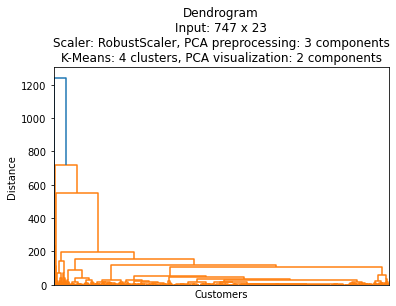

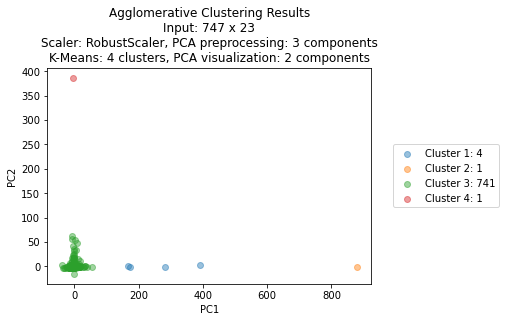

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/185064762.py:126: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

MovieWriter imagemagick unavailable; using Pillow instead.


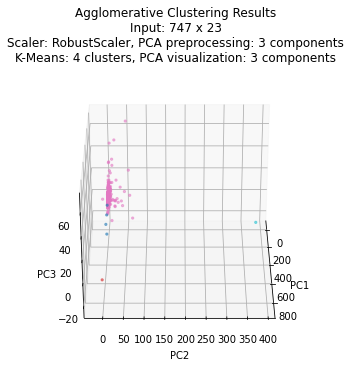

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/185064762.py:145: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



The 6 top_features for this clustering:  ['cr_txn_mean', 'cr_txn_median', 'cr_debt', 'sav_txn_median', 'sav_txn_mean', 'sav_saved']


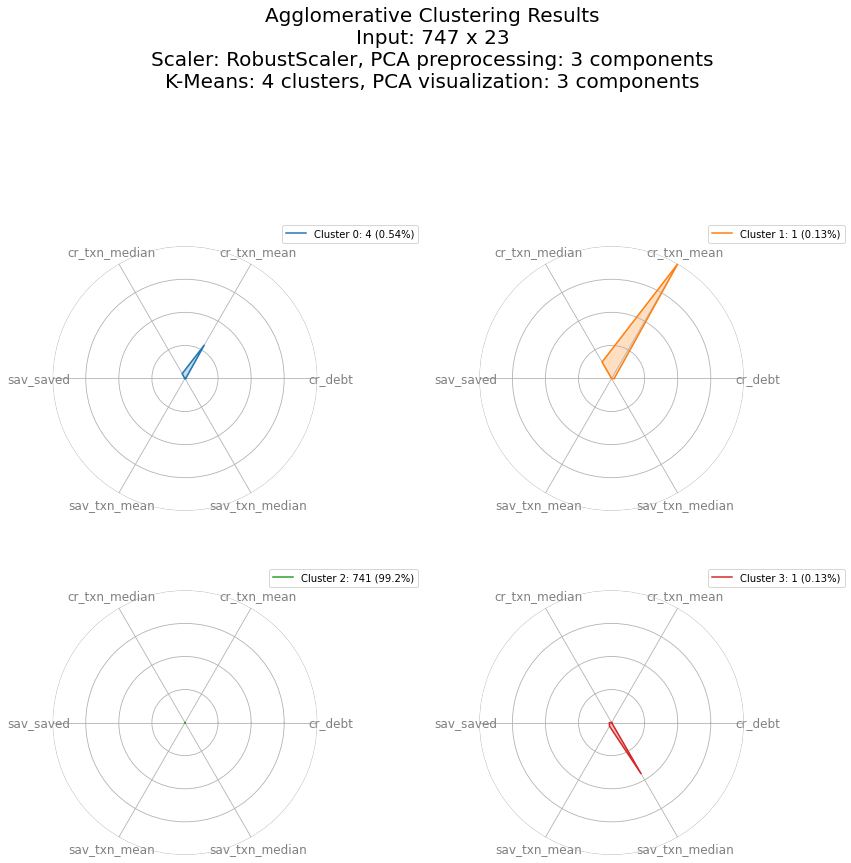

In [ ]:

clustering_algorithm = 'AgglomerativeClustering' #debug

if clustering_algorithm == 'AgglomerativeClustering': # KMeans, AgglomerativeClustering, DBSCAN

    print('clustering_algorithm: ', clustering_algorithm)
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer
    from sklearn.decomposition import PCA

    # Standardize the features using StandardScaler
    scaler = scaler_selector[scaler_method]
    cust_summary_clust_scaled = scaler.fit_transform(cust_summary_clust)

    # Perform PCA on the scaled data
    pca = PCA(n_components=PCA_n_preprocessing)
    cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)

    # Determine the optimal number of clusters using the dendrogram
    from scipy.cluster.hierarchy import dendrogram, linkage

    # Compute the linkage matrix
    Z = linkage(cust_summary_clust_pca, method='ward')

    # Plot the dendrogram
    fig, ax = plt.subplots() # figsize=(15,10)
    _ = dendrogram(Z, ax=ax)
    _ = plt.title(f'Dendrogram\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 2 components')
    _ = plt.xlabel('Customers')
    _ = plt.ylabel('Distance')
    # Hide the x-axis ticks
    _ = ax.set_xticks([])
    _ = plt.savefig(GENERATED_PATH_STEP2 + f'agg_cluster_dendrogram_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters.png', dpi=300, bbox_inches='tight',facecolor='w', edgecolor='w', pad_inches=0.3)
    _ = plt.show()

    # Based on the dendrogram, we will choose 3 clusters
    agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage='ward')
    _ = agg_clustering.fit(cust_summary_clust_pca)

    # Add the cluster labels to the original dataframe
    cust_summary_result['cluster'] = agg_clustering.labels_

    # Visualize the clusters using PCA
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # Create a scatter plot of the clusters
    for i in range(optimal_n_clusters):
        _ = plt.scatter(cust_summary_clust_pca[agg_clustering.labels_ == i, 0], 
                    cust_summary_clust_pca[agg_clustering.labels_ == i, 1], 
                    cmap=ListedColormap(COLORS), 
                    alpha=0.45, 
                    label=f'Cluster {i+1}: {len(np.where(agg_clustering.labels_ == i)[0])}') 
    _ = plt.xlabel('PC1')
    _ = plt.ylabel('PC2')
    _ = plt.title(f'Agglomerative Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 2 components')
    _ = plt.legend()
    _ = plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    _ = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    # Save the plot to a PNG file
    _ = plt.savefig(GENERATED_PATH_STEP2 + f'agg_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_2PCA.png', dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.2)

    # Show the plot
    _ = plt.show()

    # ===========================================================
    # =========== Visualize the clusters using 3D PCA ===========
    # ===========================================================
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    
    # Perform PCA on the data
    # pca = PCA(n_components=3)
    # cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)
    # danger: plot only the first 3 PCA components
    
    # Create a 3D scatter plot of the clusters using plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=cust_summary_clust_pca[:, 0],
        y=cust_summary_clust_pca[:, 1],
        z=cust_summary_clust_pca[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=agg_clustering.labels_,
            colorscale=COLORS,
            opacity=0.5
        )
    )])

    # Add axis labels and title
    _ = fig.update_layout(scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ), title=f'Agglomerative Clustering Results<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>K-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components')

    # Save the plot to a png file
    _ = fig.write_image(GENERATED_PATH_STEP2 + f'agg_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA.png')
    # save the plot to a HTML file
    _ = fig.write_html(GENERATED_PATH_STEP2 + f'agg_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA.html')

    # Show the plot
    _ = fig.show()
    
    # ====================================================================================================
    # ==== Rotate the 3D plot and save it as a GIF file ==================================================
    # ====================================================================================================
    
    import plotly.graph_objs as go
    import plotly.io as pio
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import DBSCAN
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import animation
    import numpy as np

    # create the animation
    def rotate(angle):
        ax.view_init(azim=angle)
        plt.pause(0.1) # add a pause of 0.1 seconds between frames
        return fig,

    fig = plt.figure()
    ax = Axes3D(fig)
    _ = ax.set_xlabel('PC1')
    _ = ax.set_ylabel('PC2')
    _ = ax.set_zlabel('PC3')
    _ = ax.set_title(f'Agglomerative Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components')
    scatter = ax.scatter(cust_summary_clust_pca[:, 0], 
                         cust_summary_clust_pca[:, 1], 
                         cust_summary_clust_pca[:, 2], 
                         s=5, 
                         c=agg_clustering.labels_, 
                         cmap=ListedColormap(COLORS),
                         alpha=0.5)
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=50)
    rot_animation.save(GENERATED_PATH_STEP2 + f'agg_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA.gif',
                   dpi=300, writer='imagemagick', fps=30, 
                   savefig_kwargs={'facecolor': 'white', 'edgecolor': 'w', 'bbox_inches': 'tight', 'pad_inches': 0.2},
                   metadata={'title': f'Agglomerative Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components'})


    _ = fig.show()


    # ====================================================================================================
    # ================================ Radar Plot ========================================================
    # ====================================================================================================
    # Assuming 'cust_summary_clust' is your DataFrame, and 'pca' is your fitted PCA object
    # use the same scaler to visualize the clusters
    # cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca)
    # use different scaler to visualize the clusters
    cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca,scaler_method)
    
    radar_title = f'Agglomerative Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nK-Means: {optimal_n_clusters} clusters, PCA visualization: 3 components'
    radar_file_path_and_name = GENERATED_PATH_STEP2 + f'agg_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_n_clusters}clusters_visualze_3PCA_radar.png'
    # Use the returned values to create the radar subplots
    create_radar_subplots(cust_summary_result_norm_pivot, radar_title, num_samples_per_cluster, save_path=radar_file_path_and_name)

    
    
    


### DBSCAN

#### Find the knee and "Optimal epsilon value"

method 1

In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer
# from sklearn.decomposition import PCA

# # Standardize the features using StandardScaler
# scaler = scaler_selector[scaler_method]
# cust_summary_clust_scaled = scaler.fit_transform(cust_summary_clust)

# # Perform PCA on the scaled data
# pca = PCA(n_components=PCA_n_preprocessing)
# cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)

# # Determine the optimal epsilon value and minimum samples using the knee method
# from sklearn.neighbors import NearestNeighbors
# import matplotlib.pyplot as plt
# import numpy as np

# neigh = NearestNeighbors(n_neighbors=optimal_n_clusters)
# nbrs = neigh.fit(cust_summary_clust_pca)
# distances, indices = nbrs.kneighbors(cust_summary_clust_pca)
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# fig, ax = plt.subplots()
# _ = ax.plot(distances)

# # Use the knee method to determine the optimal epsilon value
# knee = np.gradient(distances, 2).argmax()
# optimal_epsilon = distances[knee]
# print(f"Optimal epsilon value: {optimal_epsilon}")

# _ = ax.axvline(x=knee, color='r', linestyle='--')
# _ = ax.set_title('Distance plot to k-th nearest neighbor')
# _ = ax.set_xlabel('Points sorted by distance')
# _ = ax.set_ylabel(f'{optimal_n_clusters}-th nearest neighbor distance')
# plt.show()

# # Based on the plot, we will choose the optimal epsilon value and minimum samples
# dbscan_clustering = DBSCAN(eps=optimal_epsilon_value, min_samples=optimal_min_samples)
# _ = dbscan_clustering.fit(cust_summary_clust_pca)

# # Add the cluster labels to the original dataframe
# cust_summary_result['cluster'] = dbscan_clustering.labels_

# # Visualize the clusters using PCA
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# # Create a scatter plot of the clusters
# for i in range(np.max(dbscan_clustering.labels_) + 1):
#     _ = plt.scatter(cust_summary_clust_pca[dbscan_clustering.labels_ == i, 0], 
#                 cust_summary_clust_pca[dbscan_clustering.labels_ == i, 1], 
#                 cmap=ListedColormap(COLORS), 
#                 alpha=0.45, 
#                 label=f'Cluster {i+1}: {len(np.where(dbscan_clustering.labels_ == i)[0])}') 
# _ = plt.xlabel('PC1')
# _ = plt.ylabel('PC2')
# _ = plt.title(f'DBSCAN Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nEpsilon: {optimal_epsilon_value}, Minimum samples: {optimal_min_samples}, PCA visualization: 2 components')
# _ = plt.legend()
# _ = plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
# _ = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
# # Save the plot to a PNG file
# _ = plt.savefig(GENERATED_PATH_STEP2 + f'dbscan_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_{optimal_epsilon_value}_{optimal_min_samples}clusters_visualze_2PCA.png', dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.2)


method 2

In [ ]:
# from kneed import KneeLocator

# # Determine the optimal epsilon value and minimum samples using a plot of distances to k-th nearest neighbor
# from sklearn.neighbors import NearestNeighbors
# import matplotlib.pyplot as plt
# import numpy as np

# neigh = NearestNeighbors(n_neighbors=optimal_n_clusters)
# nbrs = neigh.fit(cust_summary_clust_pca)
# distances, indices = nbrs.kneighbors(cust_summary_clust_pca)
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# fig, ax = plt.subplots()
# _ = ax.plot(distances)
# _ = ax.set_title('Distance plot to k-th nearest neighbor')
# _ = ax.set_xlabel('Points sorted by distance')
# _ = ax.set_ylabel(f'{optimal_n_clusters}-th nearest neighbor distance')

# # Find the knee point
# kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve='convex', direction='increasing')
# knee_point = kneedle.knee
# _ = ax.vlines(knee_point, ymin=0, ymax=distances.max(), color='r', linestyle='--', label='knee point')
# _ = plt.legend()
# plt.show()

# # Use the knee point as the optimal epsilon value
# optimal_epsilon_value = distances[knee_point]
# optimal_epsilon_value

### DBSCAN with PCA

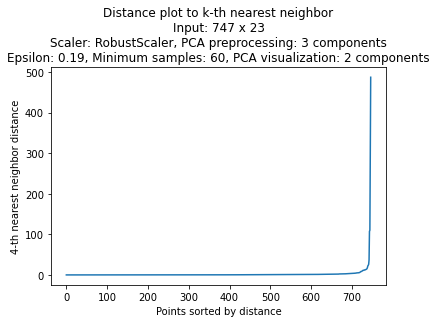

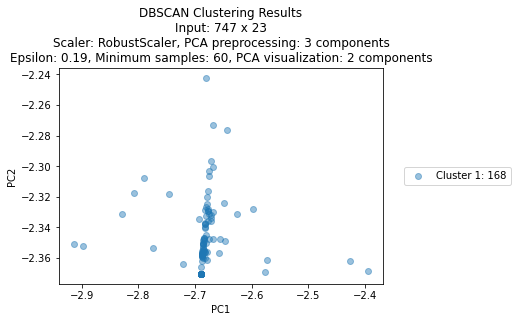

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/1772936300.py:166: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

MovieWriter imagemagick unavailable; using Pillow instead.


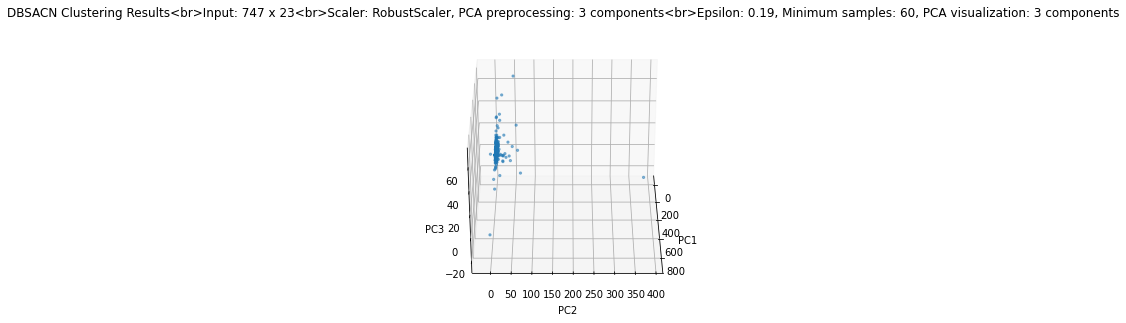

/var/folders/2z/xnw84j3s6677slw3jh12jk_c0000gp/T/ipykernel_60767/1772936300.py:185: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



The 6 top_features for this clustering:  ['cr_txn_mean', 'cr_txn_median', 'cr_debt', 'sav_txn_median', 'sav_txn_mean', 'sav_saved']


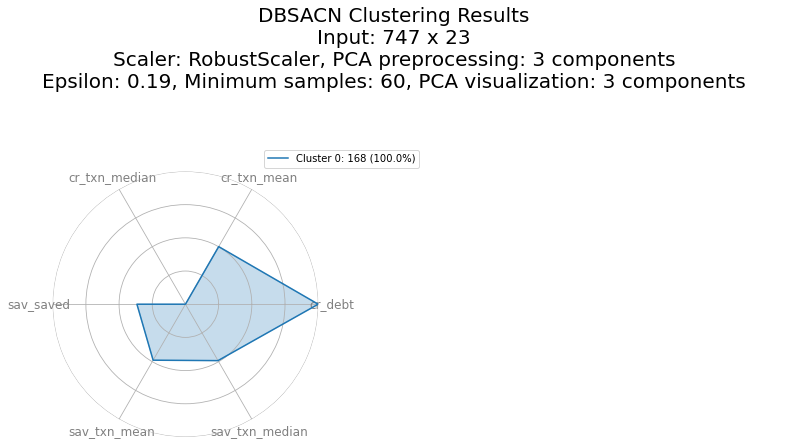

In [ ]:

clustering_algorithm = 'DBSCAN' #debug

if clustering_algorithm == 'DBSCAN': # KMeans, AgglomerativeClustering, DBSCAN

    optimal_epsilon_value = 0.19 # 0.3060280727283358

    optimal_min_samples = 60


    from sklearn.cluster import DBSCAN
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer
    from sklearn.decomposition import PCA

    # Standardize the features using StandardScaler
    scaler = scaler_selector[scaler_method]
    cust_summary_clust_scaled = scaler.fit_transform(cust_summary_clust)

    # Perform PCA on the scaled data
    pca = PCA(n_components=PCA_n_preprocessing)
    cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)

    # Determine the optimal epsilon value and minimum samples using a plot of distances to k-th nearest neighbor
    from sklearn.neighbors import NearestNeighbors
    import matplotlib.pyplot as plt
    import numpy as np

    neigh = NearestNeighbors(n_neighbors=optimal_n_clusters)
    nbrs = neigh.fit(cust_summary_clust_pca)
    distances, indices = nbrs.kneighbors(cust_summary_clust_pca)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    fig, ax = plt.subplots()
    _ = ax.plot(distances)
    _ = ax.set_title(f'Distance plot to k-th nearest neighbor\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nEpsilon: {optimal_epsilon_value}, Minimum samples: {optimal_min_samples}, PCA visualization: 2 components')
    _ = ax.set_xlabel('Points sorted by distance')
    _ = ax.set_ylabel(f'{optimal_n_clusters}-th nearest neighbor distance')
    _ = plt.savefig(GENERATED_PATH_STEP2 + f'dbscan_cluster_kth_neighbor_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}clusters_visualze_2PCA.png', dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.3)
    _ = plt.show()


    # Based on the plot, we will choose the optimal epsilon value and minimum samples
    dbscan_clustering = DBSCAN(eps=optimal_epsilon_value, min_samples=optimal_min_samples)
    _ = dbscan_clustering.fit(cust_summary_clust_pca)

    # Add the cluster labels to the original dataframe
    cust_summary_result['cluster'] = dbscan_clustering.labels_

    # Visualize the clusters using PCA
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # Create a scatter plot of the clusters
    for i in range(np.max(dbscan_clustering.labels_) + 1):
        _ = plt.scatter(cust_summary_clust_pca[dbscan_clustering.labels_ == i, 0], 
                    cust_summary_clust_pca[dbscan_clustering.labels_ == i, 1], 
                    cmap=ListedColormap(COLORS), 
                    alpha=0.45, 
                    label=f'Cluster {i+1}: {len(np.where(dbscan_clustering.labels_ == i)[0])}') 
    _ = plt.xlabel('PC1')
    _ = plt.ylabel('PC2')
    _ = plt.title(f'DBSCAN Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nEpsilon: {round(optimal_epsilon_value, 2)}, Minimum samples: {optimal_min_samples}, PCA visualization: 2 components')
    _ = plt.legend()
    _ = plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    _ = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    # Save the plot to a PNG file
    _ = plt.savefig(GENERATED_PATH_STEP2 + f'dbscan_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}clusters_visualze_2PCA.png', dpi=300, facecolor='white', edgecolor='w', bbox_inches='tight', pad_inches=0.2)

    _ = plt.show()
    # ====================================================================================================
    # ============ Visualize the clusters using 3D PCA ===================================================
    # ====================================================================================================



    # # Perform PCA on the data
    # pca = PCA(n_components=3)
    # cust_summary_clust_pca = pca.fit_transform(cust_summary_clust_scaled)
    # danger: plot only the first 3 components

    # Create a 3D scatter plot of the clusters using plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=cust_summary_clust_pca[:, 0],
        y=cust_summary_clust_pca[:, 1],
        z=cust_summary_clust_pca[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=dbscan_clustering.labels_,
            colorscale=COLORS,
            opacity=0.5
        )
    )])

    # Add axis labels and title
    _ = fig.update_layout(scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ), title=f'DBSCAN Clustering Results<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>Epsilon: {round(optimal_epsilon_value, 2)}, Minimum samples: {optimal_min_samples}, PCA visualization: 3 components')

    # Save the plot to a png file
    _ = fig.write_image(GENERATED_PATH_STEP2 + f'dbscan_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}clusters_visualze_3PCA.png')
    # save the plot to a HTML file
    _ = fig.write_html(GENERATED_PATH_STEP2 + f'dbscan_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}clusters_visualze_3PCA.html')

    _ = fig.show()
    
    # ======================================================
    # =========== HTML5 version of the Animation ===========
    # ======================================================
    
    # # Create a 3D scatter plot of the clusters using plotly
    # fig = go.Figure(data=[go.Scatter3d(
    #     x=cust_summary_clust_pca[:, 0],
    #     y=cust_summary_clust_pca[:, 1],
    #     z=cust_summary_clust_pca[:, 2],
    #     mode='markers',
    #     marker=dict(
    #         size=5,
    #         color=dbscan_clustering.labels_,
    #         colorscale=COLORS,
    #         opacity=0.5
    #     )
    # )])

    # # Add axis labels and title
    # _ = fig.update_layout(scene=dict(
    #     xaxis_title='PC1',
    #     yaxis_title='PC2',
    #     zaxis_title='PC3'
    # ), title=f'DBSCAN Clustering Results<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>Epsilon: {round(optimal_epsilon_value, 2)}, Minimum samples: {optimal_min_samples}, PCA visualization: 3 components')

    # # Save the plot to a png file
    # _ = fig.write_image(GENERATED_PATH_STEP2 + f'dbscan_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}clusters_visualze_3PCA.png')

    # # save the plot to a HTML file
    # _ = pio.to_html(fig, full_html=False, include_plotlyjs='cdn', auto_play=True, config={'displayModeBar': False})
    # with open(GENERATED_PATH_STEP2 + f'dbscan_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}clusters_visualze_3PCA.html', 'w') as f:
    #     f.write(_)

    # _ = fig.show()


    
    # ====================================================================================================
    # ==== Rotate the 3D plot and save it as a GIF file ==================================================
    # ====================================================================================================
    
    import plotly.graph_objs as go
    import plotly.io as pio
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import DBSCAN
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import animation
    import numpy as np

    # create the animation
    def rotate(angle):
        ax.view_init(azim=angle)
        plt.pause(0.1) # add a pause of 0.1 seconds between frames
        return fig,

    fig = plt.figure()
    ax = Axes3D(fig)
    _ = ax.set_xlabel('PC1')
    _ = ax.set_ylabel('PC2')
    _ = ax.set_zlabel('PC3')
    _ = ax.set_title(f'DBSACN Clustering Results<br>Input: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}<br>Scaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components<br>Epsilon: {round(optimal_epsilon_value, 2)}, Minimum samples: {optimal_min_samples}, PCA visualization: 3 components')
    _ = ax.scatter(cust_summary_clust_pca[:, 0], 
                         cust_summary_clust_pca[:, 1], 
                         cust_summary_clust_pca[:, 2], 
                         s=5, 
                         c=dbscan_clustering.labels_, 
                         cmap=ListedColormap(COLORS),
                         alpha=0.5)
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=50)
    rot_animation.save(GENERATED_PATH_STEP2 + f'dbscan_cluster_input{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}clusters_visualze_3PCA.gif', 
                   dpi=300, writer='imagemagick', fps=30, 
                   savefig_kwargs={'facecolor': 'white', 'edgecolor': 'w', 'bbox_inches': 'tight', 'pad_inches': 0.2},
                   metadata={'title': f'DBSACN Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nEpsilon: {round(optimal_epsilon_value, 2)}, Minimum samples: {optimal_min_samples}, PCA visualization: 3 components'})


    _ = fig.show()
    


    # ====================================================================================================
    # ================================ Radar Plot ========================================================
    # ====================================================================================================
    # Assuming 'cust_summary_clust' is your DataFrame, and 'pca' is your fitted PCA object
    # use the same scaler to visualize the data
    # cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca)
    # use different scaler to visualize the data
    cust_summary_result_norm_pivot, num_samples_per_cluster = prepare_data_for_radar_plot(cust_summary_clust, cust_summary_result, pca, scaler_method)

    
    radar_title = f'DBSACN Clustering Results\nInput: {cust_summary_clust.shape[0]} x {cust_summary_clust.shape[1]}\nScaler: {scaler_method}, PCA preprocessing: {PCA_n_preprocessing} components\nEpsilon: {round(optimal_epsilon_value, 2)}, Minimum samples: {optimal_min_samples}, PCA visualization: 3 components'
    radar_file_path_and_name = GENERATED_PATH_STEP2 + f'DBSACN_Clustering_Results_Input_{cust_summary_clust.shape[0]}_{cust_summary_clust.shape[1]}_{scaler_method}_PCApre{PCA_n_preprocessing}_epsilon{round(optimal_epsilon_value, 2)}_minSamples{optimal_min_samples}_PCA_visualze_3PCA_radar.png'
    # Use the returned values to create the radar subplots
    create_radar_subplots(cust_summary_result_norm_pivot, radar_title, num_samples_per_cluster, save_path=radar_file_path_and_name)

    



In [ ]:
scaler_method

'RobustScaler'

# Backup code:

In [ ]:
# import numpy as np

# # Get the absolute values of the PCA loadings
# abs_loadings = np.abs(pca.components_)

# # Get the indices of the top features for each principal component
# top_features_pc1 = np.argsort(abs_loadings[0])[::-1][:10]
# top_features_pc2 = np.argsort(abs_loadings[1])[::-1][:10]
# top_features_pc3 = np.argsort(abs_loadings[2])[::-1][:10]

# # Get the names of the top features for each principal component
# features = cust_summary_clust.columns
# top_features_pc1_names = [features[i] for i in top_features_pc1]
# top_features_pc2_names = [features[i] for i in top_features_pc2]
# top_features_pc3_names = [features[i] for i in top_features_pc3]

# # # Print the top features for each principal component
# # print('Top features for PC1:', top_features_pc1_names)
# # print('Top features for PC2:', top_features_pc2_names)
# # print('Top features for PC3:', top_features_pc3_names)

# top_features = top_features_pc1_names[:3] + top_features_pc2_names[:2] + top_features_pc3_names[:1]
# print('top_features for clustering: ', top_features)

In [ ]:
# pca.components_.shape

In [ ]:
# # Extract the top contributive features from PCA components
# n_top_features = 3 # Top features to extract from PC1 and PC2
# pc1_top_features = np.argsort(abs(pca.components_[0]))[::-1][:n_top_features]
# pc2_top_features = np.argsort(abs(pca.components_[1]))[::-1][:n_top_features]

# # Store the top features in a list
# top_features = list(cust_summary_clust.columns[pc1_top_features]) # Add top PC1 features
# for f in cust_summary_clust.columns[pc2_top_features]:
#     if f not in top_features:
#         top_features.append(f) # Add top PC2 features (excluding duplicates from PC1)

# # Extract additional top features from PC3 (if needed)
# pc3_top_features = np.argsort(abs(pca.components_[2]))[::-1]
# for f in cust_summary_clust.columns[pc3_top_features]:
#     if len(top_features) >= 6:
#         break
#     if f not in top_features:
#         top_features.append(f) # Add top PC3 features (excluding duplicates from PC1 and PC2)
# print('The 6 top_features for this clustering: ', top_features)

# rotate gif:


In [ ]:
# cust_summary_result.columns
# top_features
# # unique values of top_features
# # unique values in top_features
# pd.DataFrame(top_features).nunique()


In [ ]:
# # Extract the top contributive features from PCA components
# n_top_features = 3 # Top features to extract from PC1 and PC2
# pc1_top_features = np.argsort(abs(pca.components_[0]))[::-1][:n_top_features]
# pc2_top_features = np.argsort(abs(pca.components_[1]))[::-1][:n_top_features]

# # Store the top features in a list
# top_features = list(cust_summary_clust.columns[pc1_top_features]) # Add top PC1 features
# for f in cust_summary_clust.columns[pc2_top_features]:
#     if f not in top_features:
#         top_features.append(f) # Add top PC2 features (excluding duplicates from PC1)

# # Extract additional top features from PC3 (if needed)
# pc3_top_features = np.argsort(abs(pca.components_[2]))[::-1]
# for f in cust_summary_clust.columns[pc3_top_features]:
#     if len(top_features) >= 6:
#         break
#     if f not in top_features:
#         top_features.append(f) # Add top PC3 features (excluding duplicates from PC1 and PC2)
# print('The 6 top_features for this clustering: ', top_features)

In [ ]:


# # Extract the top contributive features from PCA components
# n_top_features = 3 # Top features to extract from PC1 and PC2
# pc1_top_features = np.argsort(abs(pca.components_[0]))[::-1][:n_top_features]
# pc2_top_features = np.argsort(abs(pca.components_[1]))[::-1][:n_top_features]

# # Store the top features in a list
# top_features = list(cust_summary_clust.columns[pc1_top_features]) # Add top PC1 features
# for f in cust_summary_clust.columns[pc2_top_features]:
#     if f not in top_features:
#         top_features.append(f) # Add top PC2 features (excluding duplicates from PC1)

# # Extract additional top features from PC3 (if needed)
# pc3_top_features = np.argsort(abs(pca.components_[2]))[::-1]
# for f in cust_summary_clust.columns[pc3_top_features]:
#     if len(top_features) >= 6:
#         break
#     if f not in top_features:
#         top_features.append(f) # Add top PC3 features (excluding duplicates from PC1 and PC2)
# print('The 6 top_features for this clustering: ', top_features)


In [ ]:

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


cust_summary_result_norm = cust_summary_result.copy()
# keep only the top_features and 'cust_id' and 'cluster' columns, drop the rest
cust_summary_result_norm = cust_summary_result_norm[['cluster'] + top_features]


# make the first column the index
cust_summary_result_norm.set_index('cluster', inplace=True)
print('cust_summary_result_norm.columns:\n')
cust_summary_result_norm.columns
print('cust_summary_result_norm.shape:\n')
cust_summary_result_norm.shape
# count the index == -1
print('Number of rows with index == -1 (noise point): ', cust_summary_result_norm.index.value_counts()[-1])
# drop rows with index == -1
cust_summary_result_norm.drop(index=-1, inplace=True)

cust_summary_result_norm.shape
# use the Normalizer to normalize the data, after that reconvert it to a dataframe with the same index and columns
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
cust_summary_result_norm = pd.DataFrame(normalizer.fit_transform(cust_summary_result_norm), index=cust_summary_result_norm.index, columns=cust_summary_result_norm.columns)
# cust_summary_result_norm.head()
# count the number of nunique of index, the size of each cluster
num_samples_per_cluster = cust_summary_result_norm.index.value_counts()
print(f'size of each cluster:\n{num_samples_per_cluster}')
# do pivot table, group by cluster and calculate the mean, and sort by cluster ascending
cust_summary_result_norm_pivot = cust_summary_result_norm.pivot_table(index='cluster', aggfunc='mean').sort_index()
print(f'cust_summary_result_norm_pivot:\n\n{cust_summary_result_norm_pivot}')

cust_summary_result_norm.columns:



Index(['cr_debt', 'cr_txn_max', 'chk_txn_max', 'chk_txn_min', 'sav_saved',
       'sav_txn_max'],
      dtype='object')

cust_summary_result_norm.shape:



(747, 6)

Number of rows with index == -1 (noise point):  579


(168, 6)

size of each cluster:
0    168
Name: cluster, dtype: int64
cust_summary_result_norm_pivot:

         chk_txn_max  chk_txn_min   cr_debt  cr_txn_max  sav_saved  \
cluster                                                              
0           0.356044    -0.237444  0.007948    0.068659  -0.000866   

         sav_txn_max  
cluster               
0           0.007492  


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from math import pi

# # Given DataFrame
# data = {'chk_txn_max': [0.127586, 0.769342, 0.267680, 0.442242],
#         'chk_txn_min': [-0.098106, -0.528524, -0.176554, -0.304442],
#         'cr_amt': [-0.040960, -0.007134, 0.568450, -0.410210],
#         'cr_txn_max': [0.107812, 0.049187, 0.673134, 0.577412],
#         'sav_amt': [0.284212, -0.015742, 0.035594, -0.055248],
#         'sav_txn_max': [0.287140, 0.074715, 0.060717, 0.083686]}
# clusters = [0, 1, 2, 3]
# df = pd.DataFrame(data, index=clusters)

# # Radar plot function
# def radar_plot(df, title):
#     categories = list(df)
#     num_vars = len(categories)
#     angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
#     angles += angles[:1]

#     fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

#     for i, row in df.iterrows():
#         values = row.values.flatten().tolist()
#         values += values[:1]
#         ax.plot(angles, values, label=f'Cluster {i}')
#         ax.fill(angles, values, alpha=0.25)

#     plt.xticks(angles[:-1], categories, color='grey', size=12)
#     plt.yticks(np.arange(-1, 1.5, 0.5), fontsize=10)
#     plt.ylim(-1, 1)
#     plt.title(title, size=20, color='blue', y=1.1)

#     ax.spines['polar'].set_visible(False)
#     plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# # Create the radar plot
# radar_plot(cust_summary_result_norm_pivot, 'Radar Plot of Normalized Cluster Data')
# plt.show()


# multi subplot version:

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from math import pi

# def radar_subplot(ax, row, cluster_label, categories, angles):
#     values = row.values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, label=f'Cluster {cluster_label}')
#     ax.fill(angles, values, alpha=0.25)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, color='grey', size=12)
#     ax.set_yticks(np.arange(-1, 1.5, 0.5))
#     ax.set_ylim(-1, 1)
#     ax.spines['polar'].set_visible(False)
#     ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# def create_radar_subplots(df, title):
#     categories = list(df)
#     num_vars = len(categories)
#     angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
#     angles += angles[:1]

#     fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
#     axes = axes.flatten()

#     for i, (index, row) in enumerate(df.iterrows()):
#         radar_subplot(axes[i], row, index, categories, angles)

#     fig.suptitle(title, fontsize=20, color='blue', y=1.05)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()

# # Assuming 'cust_summary_result_norm_pivot' is your DataFrame
# create_radar_subplots(cust_summary_result_norm_pivot, 'Radar Subplots of Normalized Cluster Data')


# Colorful Radar Chart


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from math import pi

# COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# def radar_subplot(ax, row, cluster_label, categories, angles, color):
#     values = row.values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, label=f'Cluster {cluster_label}', color=color)
#     ax.fill(angles, values, alpha=0.25, color=color)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, color='grey', size=12)
#     ax.set_yticks(np.arange(-1, 1.5, 0.5))
#     ax.set_ylim(-1, 1)
#     ax.spines['polar'].set_visible(False)
#     ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# def create_radar_subplots(df, title):
#     categories = list(df)
#     num_vars = len(categories)
#     angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
#     angles += angles[:1]

#     fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))
#     axes = axes.flatten()

#     for i, (index, row) in enumerate(df.iterrows()):
#         radar_subplot(axes[i], row, index, categories, angles, color=COLORS[i])

#     fig.suptitle(title, fontsize=20, color='blue', y=1.05)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()

# # Assuming 'cust_summary_result_norm_pivot' is your DataFrame
# create_radar_subplots(cust_summary_result_norm_pivot, 'Radar Subplots of Normalized Cluster Data with Unique Colors')


* An argument to save the figure to a specific path and filename
* An argument to show the number of samples in each cluster
* Saving the PNG with an all-white background (both face and edge)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from math import pi

# COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# def radar_subplot(ax, row, cluster_label, categories, angles, color, num_samples, all_samples):
#     values = row.values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, label=f'Cluster {cluster_label}: {num_samples} ({round(num_samples/all_samples*100,2)}%)', color=color)
#     ax.fill(angles, values, alpha=0.25, color=color)
#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories, color='grey', size=12)
#     ax.set_yticks(np.arange(-1, 1.5, 0.5))
#     ax.set_yticklabels([])
#     ax.set_ylim(-1, 1)
#     ax.spines['polar'].set_visible(False)
#     ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.1))

# def create_radar_subplots(df, title, num_samples_per_cluster, save_path=None):
#     categories = list(df)
#     num_vars = len(categories)
#     angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
#     angles += angles[:1]

#     fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True), facecolor='white', edgecolor='white')
#     axes = axes.flatten()

#     for i, (index, row) in enumerate(df.iterrows()):
#         radar_subplot(axes[i], row, index, categories, angles, color=COLORS[i], num_samples=num_samples_per_cluster[i], all_samples=sum(num_samples_per_cluster))

#     fig.suptitle(title, fontsize=20, color='black', y=1.05)
#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#     if save_path is not None:
#         plt.savefig(save_path, dpi = 300, facecolor='white', edgecolor='white', bbox_inches='tight')
#     else:
#         plt.show()

# # Assuming 'cust_summary_result_norm_pivot' is your DataFrame
# # Replace with your own number of samples per cluster


# create_radar_subplots(cust_summary_result_norm_pivot, 'Radar Subplots of Normalized Cluster Data with Unique Colors', num_samples_per_cluster, save_path='output.png')


# self adaptive rows and radius:

In [ ]:

# # Assuming 'cust_summary_result_norm_pivot' is the DataFrame

# create_radar_subplots(cust_summary_result_norm_pivot, 'Radar Subplots of Normalized Cluster Data with Unique Colors', num_samples_per_cluster, save_path='output.png')
